In [1]:
# ------------------------------------------------------------------------------------------------------------------
#              AI-based prediction of the presevervation of (i) land, forest, soil and (ii) freshwater sources,  
#                                based on instituitional dimensions             
#               
#-------------------------------------------------------------------------------------------------------------------
#--- import libraries and packages
#-------------------------------------------------------------------------------------------------------------------

import pandas as pd
import numpy as np
import math
import matplotlib
import seaborn
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline 
from datetime import datetime   
from dateutil import relativedelta
from functools import reduce
from PIL import Image
from itertools import islice
import itertools
import csv
from tabulate import tabulate
import os
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import shap
shap.initjs()
from time import time
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf

# center all the figures and tables throughout the report
from IPython.display import display, HTML
display(HTML("""<style>.output {
    display: flex;
    align-items: center;
    text-align: center;}</style> """))

print (' All libraries, tools, and functions have been succesfully uploaded  ')

 All libraries, tools, and functions have been succesfully uploaded  


In [2]:
#----------------------------------------------------------------------------------------------------------------------
# output directory
#----------------------------------------------------------------------------------------------------------------------
current_directory = os.getcwd()
path_to_save      = current_directory + r'/AI_Model_Results'
os.makedirs(path_to_save, exist_ok=True)

###  <font color='red'> input data </font> 

In [4]:
#-------------------------------------------------------------------------------------------------------
# Import Data (in Excel Format)
#-------------------------------------------------------------------------------------------------------

filename       =  r"Temperature and external factors_Database_v3.xlsx"     
Lake_data      =  pd.ExcelFile(filename)
Worksheet      =  'Sample'
num_skip_rows  = 0

df_DataBase    = []
df_DataBase    = pd.read_excel(Lake_data, Worksheet, skiprows = num_skip_rows)

df_DataBase.head(3)

Country   ID                          Area  IDn  Year  Emissions  \
0  Afghanistan  AFG        Central and South Asia    1  2007  84.709027   
1      Albania  ALB                Eastern Europe    2  2007  73.164301   
2      Algeria  DZA  Middle East and North Africa    3  2007  70.523915   

   Exposure to Air Pollution  Forest, Land and Soil  Freshwater     Oceans  \
0                  77.019233              27.654281   39.233396        NaN   
1                  75.677545              37.856287   50.715009  64.599956   
2                  61.830966              31.411565   46.818647  64.692500   

   ...  Transport  Border Administration  Open Market Scale  \
0  ...  15.720431              34.796677          14.060497   
1  ...  27.504373              57.387743          45.475710   
2  ...  32.301267              33.744312          32.814198   

   Import Tariff Barriers  Market Distortions  Temperature_change  \
0               37.648227           63.021531               0.675   
1               85.469546           65.301810               1.316   
2               34.089933           46.426063               1.220   

   Climate-driven INFORM Risk Indicator   Climate-driven Hazard & Exposure    \
0                                    NaN                                 NaN   
1                                    NaN                                 NaN   
2                                    NaN                                 NaN   

   Lack of coping capacity   Vulnerability   
0                       NaN             NaN  
1                       NaN             NaN  
2                       NaN             NaN  

[3 rows x 45 columns]

In [5]:
df_DataBase.Country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czechia', "Côte d'Ivoire",
       'Democratic Republic of Congo', 'Denmark', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Finland', 'Gabon', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
   

In [6]:
# Replace 'Taiwan, China' with 'Taiwan' and assign the result back to the 'Country' column
df_DataBase['Country'] = df_DataBase['Country'].replace('Taiwan, China', 'Taiwan')

# Check the unique values in the 'Country' column
df_DataBase['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czechia', "Côte d'Ivoire",
       'Democratic Republic of Congo', 'Denmark', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Finland', 'Gabon', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
   

In [7]:
df_DataBase.columns

Index(['Country', 'ID', 'Area', 'IDn', 'Year', 'Emissions',
       'Exposure to Air Pollution', 'Forest, Land and Soil', 'Freshwater',
       'Oceans', 'Preservation Efforts', 'Executive Constraints',
       'Political Accountability', 'Rule of Law', 'Government Integrity',
       'Government Effectiveness', 'Regulatory Quality', 'Property Rights',
       'Investor Protection', 'Contract Enforcement', 'Financing Ecosystem',
       'Restrictions on International Investment',
       'Domestic Market Contestability', 'Environment for Business Creation',
       'Burden of Regulation', 'Labour Market Flexibility',
       'Price Distortions', 'Fiscal Sustainability', 'Macroeconomic Stability',
       'Productivity and Competitiveness', 'Dynamism',
       'Labour Force Engagement', 'Communications', 'Energy', 'Water',
       'Transport', 'Border Administration', 'Open Market Scale',
       'Import Tariff Barriers', 'Market Distortions', 'Temperature_change',
       'Climate-driven INFORM Risk

In [8]:
# exclude first 7 'Country', 'ID', 'Area', 'IDN', Year', 'Emission', 'Exposure to Air Pollution' 
# in determining the number of predictors

print('number of predictors = ', len(df_DataBase.columns) - 7)

number of predictors =  38


In [9]:
#-------------------------------------------------------------------------------------------------------
# - complete list of countries (array)
#-------------------------------------------------------------------------------------------------------
group       = df_DataBase.groupby('Country')
countries = df_DataBase.groupby('Country')['Country'].agg('unique').astype('str')
countries

Country
Afghanistan    ['Afghanistan']
Albania            ['Albania']
Algeria            ['Algeria']
Angola              ['Angola']
Argentina        ['Argentina']
                    ...       
Venezuela        ['Venezuela']
Vietnam            ['Vietnam']
Yemen                ['Yemen']
Zambia              ['Zambia']
Zimbabwe          ['Zimbabwe']
Name: Country, Length: 167, dtype: object

In [10]:
# remove extra "[]"
i = 0
country_name = []
for country in countries:
    i = i+1
    country_name.append(country.strip(" '[]' "))
country_name[0:5]

['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina']

In [11]:
# number of countries
print('Number of countries: ', len(country_name))

Number of countries:  167


In [12]:
# create the list of countries
df_list_or  = []
df_list     = []

for i in range(len(country_name)):
    #print(country_name[i])
    condition = df_DataBase['Country'] == country_name[i]
    df_test   = df_DataBase[condition]
    
    dfName = 'df_' + country_name[i]
    #print(dfName)
    globals()[dfName] = df_test.copy()
    
    # countries with non-missing Renewables data AND non-missing CO2(kg) 
    if (  ((globals()[dfName]['Emissions']).notnull().any()) == True & \
          ((globals()[dfName]['Exposure to Air Pollution']).notnull().any()) == True) :
        df_list.append(dfName)
        
print()
print('Countries to be considered in ML analysis')
print('-----------------------------------------')
print(df_list)

print()
print('Number of countries used in ML analysis :', len(df_list))


Countries to be considered in ML analysis
-----------------------------------------
['df_Afghanistan', 'df_Albania', 'df_Algeria', 'df_Angola', 'df_Argentina', 'df_Armenia', 'df_Australia', 'df_Austria', 'df_Azerbaijan', 'df_Bahrain', 'df_Bangladesh', 'df_Belarus', 'df_Belgium', 'df_Belize', 'df_Benin', 'df_Bolivia', 'df_Bosnia and Herzegovina', 'df_Botswana', 'df_Brazil', 'df_Bulgaria', 'df_Burkina Faso', 'df_Burundi', 'df_Cabo Verde', 'df_Cambodia', 'df_Cameroon', 'df_Canada', 'df_Central African Republic', 'df_Chad', 'df_Chile', 'df_China', 'df_Colombia', 'df_Comoros', 'df_Congo', 'df_Costa Rica', 'df_Croatia', 'df_Cuba', 'df_Cyprus', 'df_Czechia', 'df_Democratic Republic of Congo', 'df_Denmark', 'df_Djibouti', 'df_Dominican Republic', 'df_Ecuador', 'df_Egypt', 'df_El Salvador', 'df_Equatorial Guinea', 'df_Eritrea', 'df_Estonia', 'df_Eswatini', 'df_Ethiopia', 'df_Finland', 'df_France', 'df_Gabon', 'df_Georgia', 'df_Germany', 'df_Ghana', 'df_Greece', 'df_Guatemala', 'df_Guinea', 'df

###  <font color='red'> missing data </font> 

In [14]:
# --- check missing data

def status(df):
    table = [[i,
           len(df[i]), df[i].isna().sum(),
            "{:.1%}".format(df[i].isna().sum()/len(df[i]))]
          for i in df.columns]
    headers = ['Features', 'Observations', 'No of missing', '% Missing ']
    print(tabulate(table, headers, tablefmt='simple', numalign='center'))

In [15]:
status(df_DataBase)

Features                                   Observations    No of missing   % Missing
----------------------------------------  --------------  ---------------  ------------
Country                                        2839              0         0.0%
ID                                             2839              0         0.0%
Area                                           2839              0         0.0%
IDn                                            2839              0         0.0%
Year                                           2839              0         0.0%
Emissions                                      2839              0         0.0%
Exposure to Air Pollution                      2839              0         0.0%
Forest, Land and Soil                          2839              0         0.0%
Freshwater                                     2839              0         0.0%
Oceans                                         2839             748        26.3%
Preservation Efforts      

###  <font color='green'> the 'Ocean' category, with 26.3% missing data, was excluded from further analysis  </font> 

In [17]:
df_DataBase.drop(['Oceans'], axis=1, inplace=True)
df_DataBase.columns

Index(['Country', 'ID', 'Area', 'IDn', 'Year', 'Emissions',
       'Exposure to Air Pollution', 'Forest, Land and Soil', 'Freshwater',
       'Preservation Efforts', 'Executive Constraints',
       'Political Accountability', 'Rule of Law', 'Government Integrity',
       'Government Effectiveness', 'Regulatory Quality', 'Property Rights',
       'Investor Protection', 'Contract Enforcement', 'Financing Ecosystem',
       'Restrictions on International Investment',
       'Domestic Market Contestability', 'Environment for Business Creation',
       'Burden of Regulation', 'Labour Market Flexibility',
       'Price Distortions', 'Fiscal Sustainability', 'Macroeconomic Stability',
       'Productivity and Competitiveness', 'Dynamism',
       'Labour Force Engagement', 'Communications', 'Energy', 'Water',
       'Transport', 'Border Administration', 'Open Market Scale',
       'Import Tariff Barriers', 'Market Distortions', 'Temperature_change',
       'Climate-driven INFORM Risk Indicator

In [18]:
# Create a new dataframe including countries 

df_list_country = []

for i in range(len(df_list)):
    df_list_country.append(df_list[i][3:])

    
condition = df_DataBase['Country'].isin(df_list_country)      
df_DataBase_condensed = df_DataBase[condition]
df_DataBase_condensed  

# verify the accuracy of the number of countires on the list
len(df_DataBase_condensed['Country'].unique())

166

In [19]:
# condensed dataframe after removing missing data
df_DataBase_condensed.reset_index(inplace = True, drop = True)
df_DataBase_condensed

Country   ID                             Area  IDn  Year  Emissions  \
0     Afghanistan  AFG           Central and South Asia    1  2007  84.709027   
1         Albania  ALB                   Eastern Europe    2  2007  73.164301   
2         Algeria  DZA     Middle East and North Africa    3  2007  70.523915   
3          Angola  AGO               Sub-Saharan Africa    4  2007  71.259956   
4       Argentina  ARG  Latin America and the Caribbean    5  2007  62.864388   
...           ...  ...                              ...  ...   ...        ...   
2817    Venezuela  VEN  Latin America and the Caribbean  163  2023  72.458076   
2818      Vietnam  VNM            East Asia and Pacific  164  2023  52.722445   
2819        Yemen  YEM     Middle East and North Africa  165  2023  78.585595   
2820       Zambia  ZMB               Sub-Saharan Africa  166  2023  60.733961   
2821     Zimbabwe  ZWE               Sub-Saharan Africa  167  2023  57.401155   

      Exposure to Air Pollution  Forest, Land and Soil  Freshwater  \
0                     77.019233              27.654281   39.233396   
1                     75.677545              37.856287   50.715009   
2                     61.830966              31.411565   46.818647   
3                     74.057277              55.309896   50.413274   
4                     86.106625              52.019060   57.943408   
...                         ...                    ...         ...   
2817                  79.190424              42.261454   55.003298   
2818                  65.267968              43.641224   56.915633   
2819                  64.415021              28.161318   18.431124   
2820                  70.311412              51.774013   50.626968   
2821                  76.074197              39.826196   53.293954   

      Preservation Efforts  ...  Transport  Border Administration  \
0                14.190192  ...  15.720431              34.796677   
1                34.915049  ...  27.504373              57.387743   
2                36.690163  ...  32.301267              33.744312   
3                16.415135  ...  24.271519              35.149397   
4                35.728607  ...  41.450412              52.277269   
...                    ...  ...        ...                    ...   
2817             53.289439  ...  23.593682              25.068373   
2818             40.241784  ...  54.820317              63.544427   
2819             27.005264  ...  27.875834              46.660817   
2820             64.501079  ...  28.898024              42.110118   
2821             40.050349  ...  24.058239              38.399439   

      Open Market Scale  Import Tariff Barriers  Market Distortions  \
0             14.060497               37.648227           63.021531   
1             45.475710               85.469546           65.301810   
2             32.814198               34.089933           46.426063   
3             14.382750               38.292987           32.591213   
4             24.415959               52.638153           43.569921   
...                 ...                     ...                 ...   
2817           3.924632               41.450947           20.416696   
2818          89.357732               67.052587           55.987670   
2819          17.980931               55.373062           14.957631   
2820          17.408848               65.734775           43.586135   
2821          39.721689               46.712769           37.644948   

      Temperature_change  Climate-driven INFORM Risk Indicator   \
0                  0.675                                    NaN   
1                  1.316                                    NaN   
2                  1.220                                    NaN   
3                  0.885                                    NaN   
4                 -0.169                                    NaN   
...                  ...                                    ...   
2817                 NaN                     

In [20]:
# calculate missing number of data in each data type

missing_data = []
feature_list = []

for i in range(len(df_DataBase_condensed.columns)):
    var = df_DataBase_condensed.columns[i]
    data_missing     = df_DataBase_condensed[var].isnull().sum() 
    data_expected    = len(df_DataBase_condensed[var])       
    data_available   = data_expected - data_missing
    missing_data.append(data_missing)
    feature_list.append( df_DataBase_condensed.columns[i] )  

In [21]:
len(df_DataBase_condensed)

2822

<Figure size 640x480 with 0 Axes>

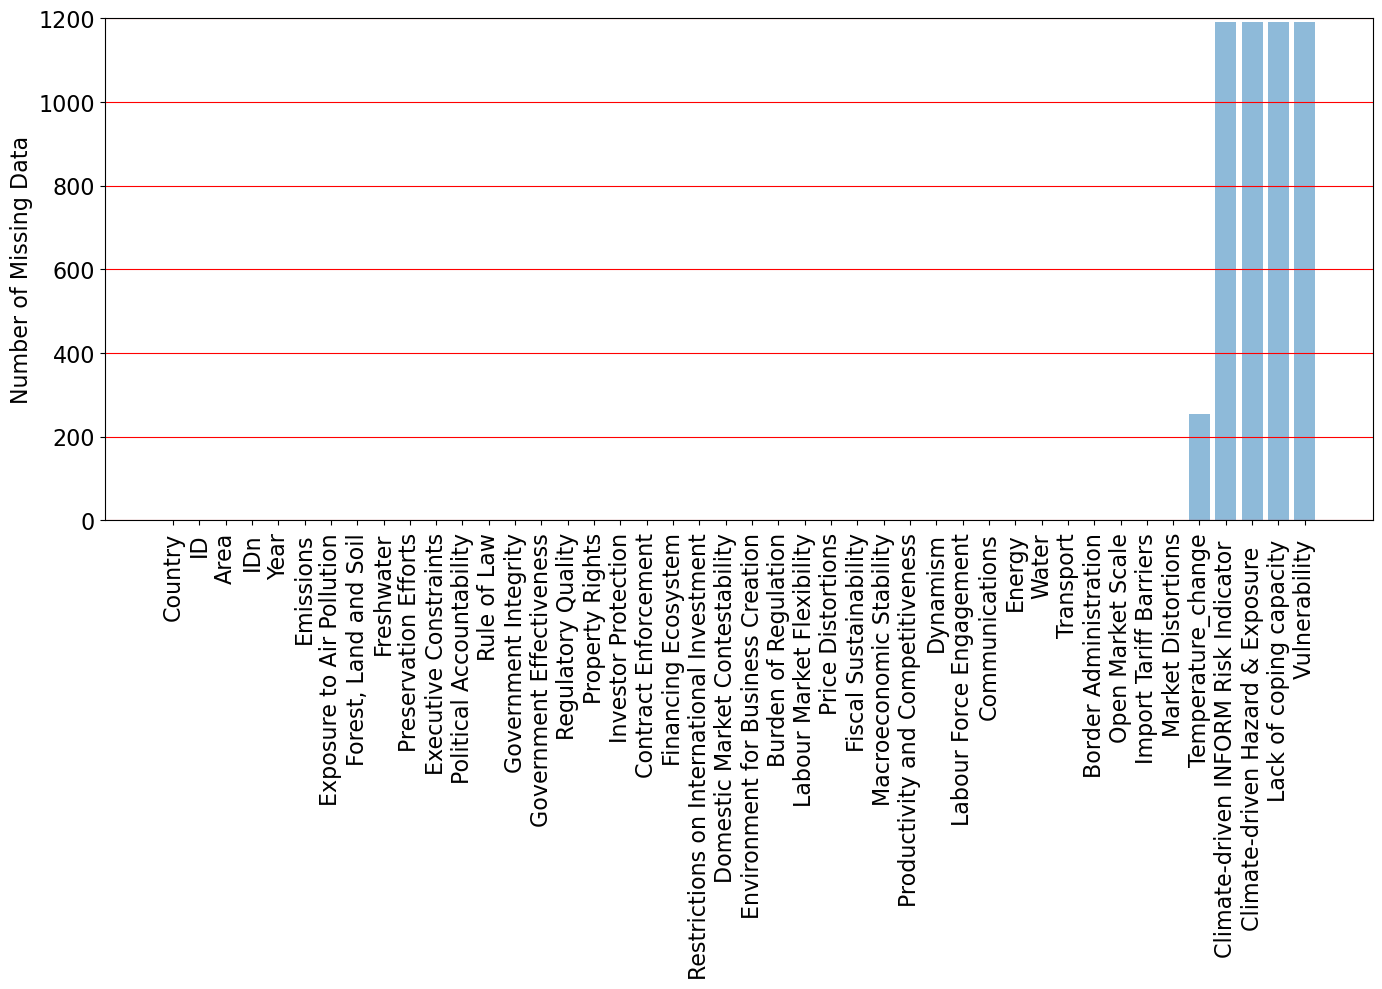

In [22]:
# Plot missing data
#--------------------

fig      = plt.figure()
fig      = plt.figure(figsize=(36,30))
fnt_size = 16
ax = fig.add_subplot(4,2,1)

ax.bar(feature_list , missing_data, align= 'center', alpha = 0.5 )
ax.grid(False, which='major', axis='x' )
ax.grid(True, which='major', axis='y',  color='red')
ax.tick_params(axis = "x", labelsize = fnt_size, rotation = 90)
ax.xaxis.set_tick_params(pad=5)
ax.tick_params(axis = "y", labelsize = fnt_size, rotation = 0)
ax.xaxis.set_tick_params(pad=5)
ax.set_ylabel('Number of Missing Data', fontsize = fnt_size)
ax.set_ylim([0, 1200])
plt.show()

# Correlation Map

In [24]:
df_DataBase_condensed_clone = []
df_DataBase_condensed_clone = df_DataBase_condensed.copy()

# drop the first 4 columns
df_DataBase_condensed_clone_1 = []
df_DataBase_condensed_clone_1 = df_DataBase_condensed_clone.iloc[:, 5:]
df_DataBase_condensed_clone_1

# drop also last four columns
df_DataBase_condensed_clone_2 = []
df_DataBase_condensed_clone_2 = df_DataBase_condensed_clone_1.iloc[:,:-4]
df_DataBase_condensed_clone_2.head(3)

Emissions  Exposure to Air Pollution  Forest, Land and Soil  Freshwater  \
0  84.709027                  77.019233              27.654281   39.233396   
1  73.164301                  75.677545              37.856287   50.715009   
2  70.523915                  61.830966              31.411565   46.818647   

   Preservation Efforts  Executive Constraints  Political Accountability  \
0             14.190192              32.848882                 34.270532   
1             34.915049              52.101720                 76.828351   
2             36.690163              42.688856                 45.691339   

   Rule of Law  Government Integrity  Government Effectiveness  ...  \
0    32.411973             20.123564                 29.118566  ...   
1    41.126615             33.256320                 48.715803  ...   
2    44.065657             38.642278                 34.087929  ...   

   Labour Force Engagement  Communications     Energy      Water  Transport  \
0                17.773019       23.686349  20.392296  29.316259  15.720431   
1                37.459121       37.782016  32.979801  55.298845  27.504373   
2                32.097723       33.284729  36.995082  68.148611  32.301267   

   Border Administration  Open Market Scale  Import Tariff Barriers  \
0              34.796677          14.060497               37.648227   
1              57.387743          45.475710               85.469546   
2              33.744312          32.814198               34.089933   

   Market Distortions  Temperature_change  
0           63.021531               0.675  
1           65.301810               1.316  
2           46.426063               1.220  

[3 rows x 35 columns]

In [25]:
len(df_DataBase_condensed_clone_2)

2822

In [26]:
fnt_size = 12

def corr_map(df_test, text_y, corr_fnt_size, fname):

    fig, ax     = plt.subplots(ncols=1, nrows=1, figsize=(34,15))
    corr_min    = -1
    corr_max    =  1

    df_test             = df_test.dropna()
    data_length         = len(df_test)  
    print('Number of data : ' , data_length)
    single_variate_corr = df_test.corr('pearson')
    corr_ax             = ax.matshow(single_variate_corr, cmap='coolwarm', vmin = corr_min , vmax = corr_max )

    ax.set_xticks(range(len(df_test.columns)))
    ax.set_yticks(range(len(df_test.columns)))
    ax.set_xticklabels(df_test.columns)
    ax.set_yticklabels(df_test.columns)

    ax.set_title('Correlation', y=text_y, fontsize = fnt_size)

    plt.setp(ax.get_xticklabels(), rotation=90, ha='left', rotation_mode='anchor', fontsize = fnt_size)
    plt.setp(ax.get_yticklabels(), rotation=0, ha='right', rotation_mode='anchor', fontsize = fnt_size)

    colorbar = plt.colorbar(corr_ax, pad=0.05, ax=ax, shrink=0.76, label='$R^2$')
    colorbar.set_label(label='$R^2$', weight='bold', fontsize = fnt_size, rotation=0, y=1.1, ha='right')

    for i in range(len(df_test.columns)):
        for j in range(len(df_test.columns)):
            text = ax.text(j, i, round(single_variate_corr.iloc[j,i], 2), ha="center", va="center", \
                            fontsize = corr_fnt_size, color="black")

    plt.savefig(f'{path_to_save}/{fname}.jpeg', format='jpeg', dpi=300, bbox_inches='tight')
                
    plt.show()    
    return (single_variate_corr, data_length, df_test)

Number of data :  2568


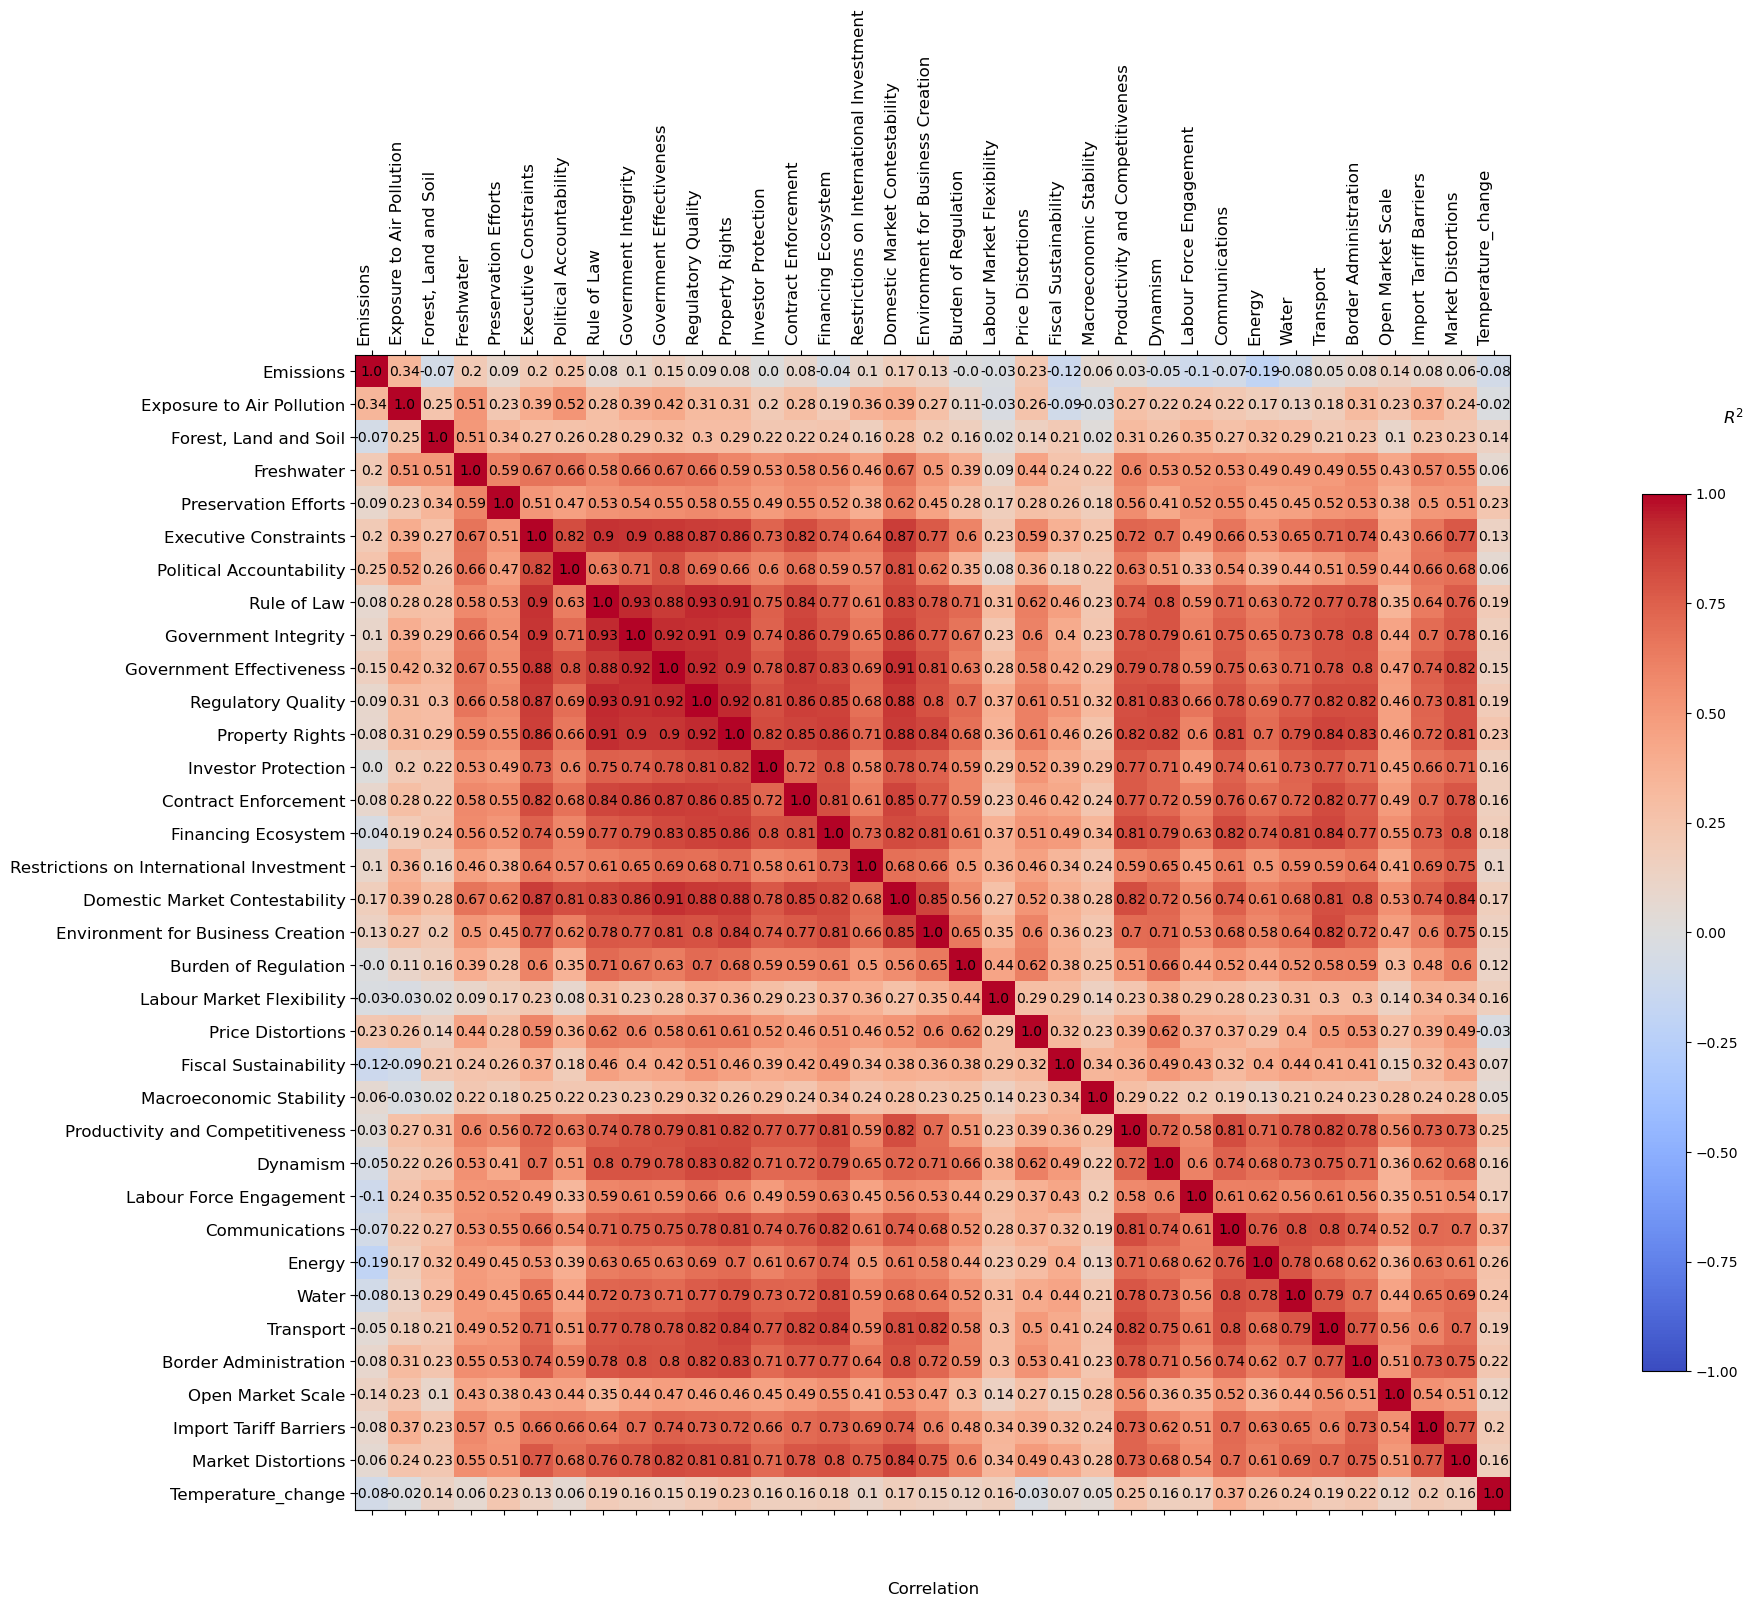

In [27]:
ytext                 = -0.08
corr_fnt_size         = 10
filename              = 'Corrmap_all_vars'
fname                 = 'Correlation_Map_All_Variables'
sv_corr,  data_length, df_test  = corr_map(df_DataBase_condensed_clone_2, ytext, corr_fnt_size, fname)

In [28]:
def corr_plot_function(df_var1, df_var2, fname, length_data, x_text_num_data, title, ymin, ymax, ytitle, corr_plot, path_to_save):
    
    # Ensure the figure is only created once with the specified size
    fig = plt.figure(figsize=(36, 30))
    
    fnt_size = 18
    ax = fig.add_subplot(4, 2, 1)
    
    # Plot the data
    ax.plot(df_var1, df_var2, '-o', markersize=12)  
        
    ax.grid()
    ax.set_xlabel(' ', fontsize=fnt_size)
    ax.tick_params(axis="x", labelsize=fnt_size, rotation=90)
    ax.tick_params(axis="y", labelsize=fnt_size)
    ax.xaxis.set_tick_params(pad=5)

    ax.set_ylabel(ytitle, fontsize=fnt_size) 
    ax.set_ylim([ymin, ymax])
    ax.yaxis.set_tick_params(pad=5) 
    yoffset = 0.05     
    
    ax.set_title(title, fontsize=fnt_size)

    if corr_plot == 'True':
        x = np.arange(1, 13, 1)
        num_data = len(x)
        y1 = 0.74
        y2 = 0.76
        y3 = -0.74
        y4 = -0.76

        font = {'family': 'serif', 'color': 'red', 'weight': 'normal', 'size': 14}
        plt.fill_between(df_var1, y1, y2, alpha=0.3, facecolor='red') 
        plt.text(x_text_num_data, 0.78, r'$R^2$ = 0.75', fontdict=font)

        plt.fill_between(df_var1, y3, y4, alpha=0.3, facecolor='red') 
        plt.text(x_text_num_data, -0.88, r'$R^2$ = -0.75', fontdict=font)  

        font2 = {'family': 'serif', 'color': 'black', 'weight': 'bold', 'size': 16}
        note = f'Number of data = {length_data}'
        plt.text(0.001, -1.1, note, fontdict=font2)

        # Save the plot as a .jpeg file
#        plt.savefig(f'{path_to_save}/{fname}.jpeg', format='jpeg', dpi=300, bbox_inches='tight')

    # Show the plot
    plt.show()

Number of data :  1578


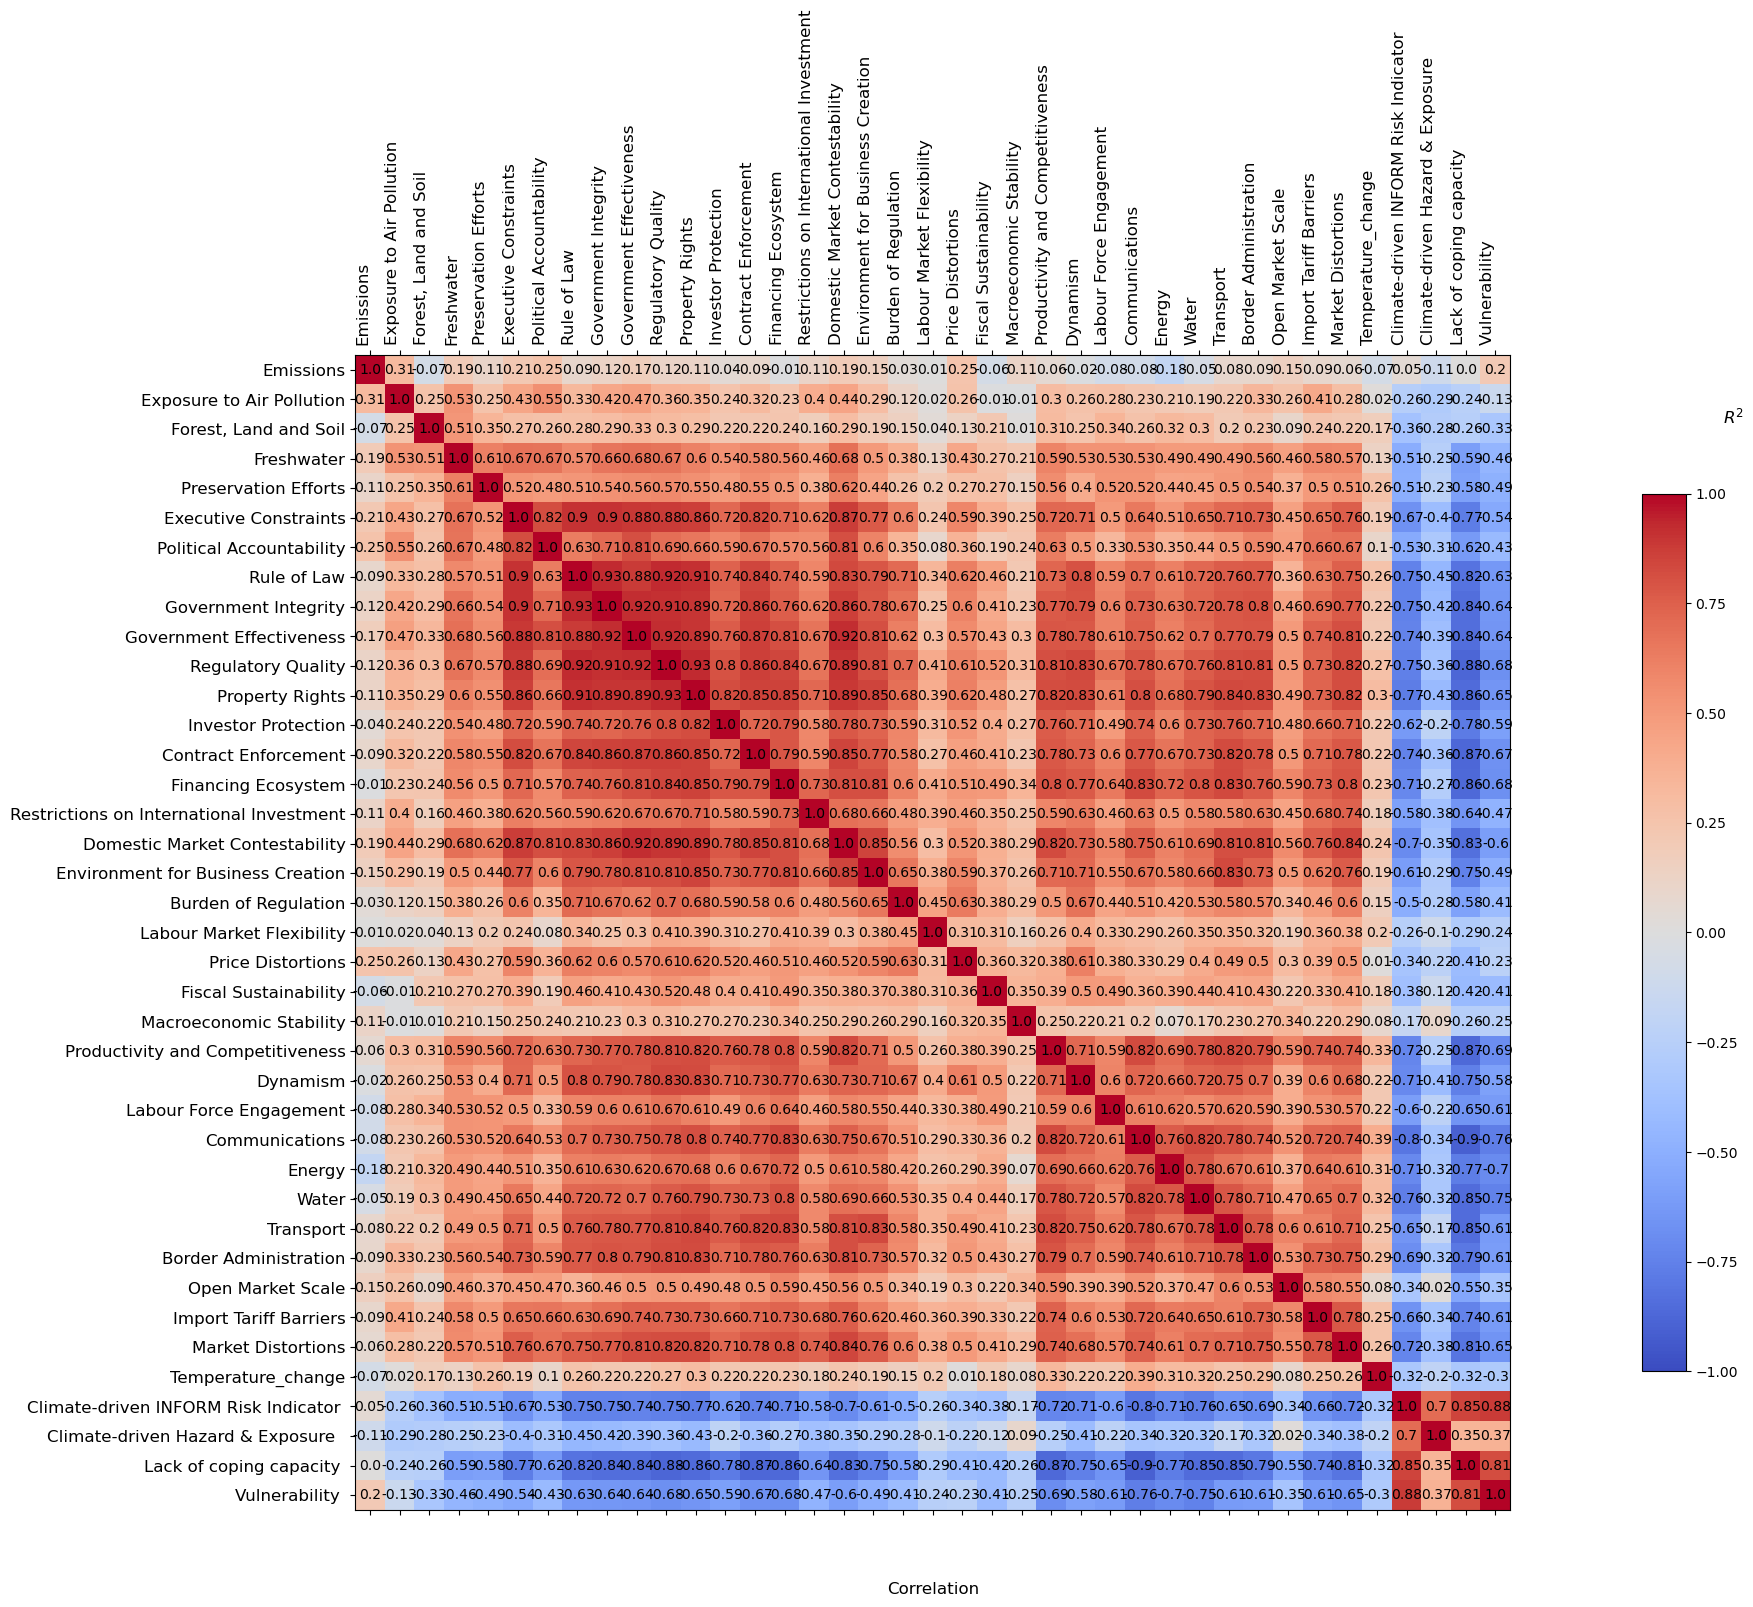

In [29]:
ytext                 = -0.08
corr_fnt_size         = 10
filename              = 'Corrmap_all_vars'
fname                 = 'Include_Last_Fours_Vars'
sv_corr,  data_length, df_test  = corr_map(df_DataBase_condensed_clone_1, ytext, corr_fnt_size, fname)

# <font color='blue'> Pre-ML Analysis

In [31]:
df_CO2_data_analysis = []
df_CO2_data_analysis = df_DataBase_condensed.copy()
df_CO2_data_analysis.reset_index(inplace=True, drop = True)

# Plot Functions

In [33]:
def simple_plot(data_or, data_pred, ytitle, ymin, ymax, title):
    fig      = plt.figure()

    fig      = plt.figure(figsize=(36,30))
    fnt_size = 18

    ax = fig.add_subplot(4,2,1)
    
    ax.plot( data_or, 'o', color = 'red' , markersize=12, fillstyle='none', linewidth = 12, \
           label = 'Original Data')  
    ax.plot( data_pred, '+k',  markersize=12, label = 'Predicted') 
    
    ax.grid()
    ax.set_xlabel('Data Index ', fontsize = fnt_size)

    ax.tick_params(axis = "x", labelsize = fnt_size, rotation = 0)
    ax.tick_params(axis = "y", labelsize = fnt_size)
    ax.xaxis.set_tick_params(pad=5)

    ax.set_ylabel(ytitle, fontsize = fnt_size) 
    ax.set_ylim([ymin, ymax])
    ax.yaxis.set_tick_params(pad=5) 
    yoffset=0.05 
    
    plt.legend(loc = 1, fontsize = fnt_size, shadow=True)
    
    ax.set_title(title, fontsize = fnt_size)
    plt.show()

# <font color='blue'> Prepare Data for ML/AI analysis

In [35]:
df_DataBase_condensed_clone_1 # This includes vulnerability indices that have 46% missing data
df_DataBase_condensed_clone_2 # this excludes vulnerabiliyy variables

Emissions  Exposure to Air Pollution  Forest, Land and Soil  Freshwater  \
0     84.709027                  77.019233              27.654281   39.233396   
1     73.164301                  75.677545              37.856287   50.715009   
2     70.523915                  61.830966              31.411565   46.818647   
3     71.259956                  74.057277              55.309896   50.413274   
4     62.864388                  86.106625              52.019060   57.943408   
...         ...                        ...                    ...         ...   
2817  72.458076                  79.190424              42.261454   55.003298   
2818  52.722445                  65.267968              43.641224   56.915633   
2819  78.585595                  64.415021              28.161318   18.431124   
2820  60.733961                  70.311412              51.774013   50.626968   
2821  57.401155                  76.074197              39.826196   53.293954   

      Preservation Efforts  Executive Constraints  Political Accountability  \
0                14.190192              32.848882                 34.270532   
1                34.915049              52.101720                 76.828351   
2                36.690163              42.688856                 45.691339   
3                16.415135              31.361587                 33.077061   
4                35.728607              42.342829                 79.363021   
...                    ...                    ...                       ...   
2817             53.289439               7.563226                 28.883916   
2818             40.241784              39.383698                 35.303171   
2819             27.005264              24.269323                 29.090641   
2820             64.501079              42.930489                 54.642933   
2821             40.050349              25.033718                 42.044758   

      Rule of Law  Government Integrity  Government Effectiveness  ...  \
0       32.411973             20.123564                 29.118566  ...   
1       41.126615             33.256320                 48.715803  ...   
2       44.065657             38.642278                 34.087929  ...   
3       33.555283             25.042299                 21.974902  ...   
4       37.737702             47.550149                 56.598444  ...   
...           ...                   ...                       ...  ...   
2817    10.583343             10.983013                  8.452111  ...   
2818    41.874105             54.586889                 55.657647  ...   
2819    19.186550             15.922287                  2.666834  ...   
2820    39.059582             40.892920                 34.203253  ...   
2821    35.823266             26.074370                 22.323910  ...   

      Labour Force Engagement  Communications     Energy      Water  \
0                   17.773019       23.686349  20.392296  29.316259   
1                   37.459121       37.782016  32.979801  55.298845   
2                   32.097723       33.284729  36.995082  68.148611   
3                   57.653726       28.304623  18.418403  30.751788   
4                   54.488624       44.707247  45.918696  44.459535   
...                       ...             ...        ...        ...   
2817                49.131774       71.743286  64.926488  41.996137   
2818                67.643898       82.660105  46.247981  50.934496   
2819                23.380584       41.645352  20.222271  30.176073   
2820                41.254448       50.553316  21.722373  22.397377   
2821                57.914527       54.303937  35.514350  39.652782   

      Transport  Border Administration  Open Market Scale  \
0     15.720431              34.796677          14.060497   
1     27.504373              57.387743          45.475710   
2     32.301267              33.744312          32.814198   
3     24.271519              35.149397          14.382750   
4     41.450412              52.27726

In [36]:
# remove NaNs

print('include vulnerability indices')
print('length of the original data :', len(df_DataBase_condensed_clone_1))
df_DataBase_condensed_clone_1 = df_DataBase_condensed_clone_1.dropna()
df_DataBase_condensed_clone_1.reset_index(inplace=True, drop = True)
df_DataBase_condensed_clone_1
print('length of the original data :', len(df_DataBase_condensed_clone_1))

print('-------')

print('exclude vulnerability indices')
print('length of the original data :', len(df_DataBase_condensed_clone_2))
df_DataBase_condensed_clone_2 = df_DataBase_condensed_clone_2.dropna()
df_DataBase_condensed_clone_2.reset_index(inplace=True, drop = True)
df_DataBase_condensed_clone_2
print('length of the original data :', len(df_DataBase_condensed_clone_2))

include vulnerability indices
length of the original data : 2822
length of the original data : 1578
-------
exclude vulnerability indices
length of the original data : 2822
length of the original data : 2568


# <font color='tomato'> XAI Modeling Using the Full Feature Set

# <font color='tomato'> 1. Random Forest

In [39]:
from sklearn.ensemble import RandomForestRegressor

def RF_Regressor(df_data, target_var_index, rem_features, test_data_frac, random_state):
    
    target_vars  = df_data.columns[target_var_index]
    
    # remove selected features from the predictors list
    feature_vars = [element for (i,element) in enumerate(df_data.columns) if i not in rem_features]

    print('')
    print('Predictors:', feature_vars)
    print('')
    print('Target Variable : ', target_vars)
    print('----------------------------')
    
    X = df_data[feature_vars].to_numpy()
    Y = df_data[target_vars].to_numpy()
    
#    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = test_data_frac, \
#                                                        random_state = random_state, shuffle = False )
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = test_data_frac, random_state = random_state )
    t0 = time()
    
    RF_model = RandomForestRegressor(random_state = random_state)
    RF_model.fit(X_train, y_train)

    t1         = time()
    Time_Taken = (t1-t0)/60
    print("Time taken to train the model: %0.2f" % Time_Taken,"minutes")

    Y_Train_Pred = RF_model.predict(X_train)

    rmse = np.sqrt(mean_squared_error(y_train,Y_Train_Pred))
    RSQ  = r2_score(y_train,Y_Train_Pred)
    MAE  = np.mean(np.abs(y_train - Y_Train_Pred))
    
    metric_train = np.array(['', np.round(rmse,3), np.round(MAE,3), np.round(RSQ,3)])
    print("############ Model Accuracy ############")
    print("RMSE: %0.3f" % rmse,"[unit]")
    print("MAE: %0.3f" % MAE,"[unit]")
    print("R-squared: %0.3f" % RSQ)
    print("########################################")
    print(" ")

    Y_Test_Pred = RF_model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test,Y_Test_Pred))
    RSQ  = r2_score(y_test,Y_Test_Pred)
    MAE  = np.mean(np.abs(y_test - Y_Test_Pred))
    
    metric_test = np.array(['', np.round(rmse,3), np.round(MAE,3), np.round(RSQ,3)])
    metric      = np.append(metric_train, metric_test)

    #RSQ_flag = RSQ
    print("############ Model Accuracy ############")
    print("RMSE: %0.3f" % rmse,"[unit]")
    print("MAE: %0.3f" % MAE,"[unit]")
    print("R-squared: %0.3f" % RSQ)
    print("########################################")
    print(" ")
    
    len_TestData = len(X_test)
    
    # retrain RF_model 
    RF_model.fit(X, Y)
    
    return [RF_model, X_test, y_test, Y_Test_Pred, metric, len_TestData, feature_vars]

# <font color='tomato'> 2. XGBoost

In [41]:
def XGBoost_Regressor(df_data, target_var_index, rem_features, test_data_frac, random_state):
    
    target_vars = df_data.columns[target_var_index]
    
    # remove selected features from the predictors list
    feature_vars = [element for (i,element) in enumerate(df_data.columns) if i not in rem_features]
   
    print('')
    print('Predictors:', feature_vars)
    print('')
    print('Target Variable : ', target_vars)
    print('----------------------------')
    
    X = df_data[feature_vars].to_numpy()
    Y = df_data[target_vars].to_numpy()

#    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = test_data_frac, \
#                                                        random_state = random_state, shuffle = False )
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = test_data_frac, random_state = random_state)
    t0 = time()

    xgb_model = XGBRegressor(random_state=random_state)
    xgb_model.fit(X_train, y_train)

    t1 = time()
    Time_Taken = (t1-t0)/60
    print("Time taken to train the model: %0.2f" % Time_Taken,"minutes")

    Y_Train_Pred = xgb_model.predict(X_train)

    rmse = np.sqrt(mean_squared_error(y_train,Y_Train_Pred))
    RSQ  = r2_score(y_train,Y_Train_Pred)
    MAE  = np.mean(np.abs(y_train - Y_Train_Pred))
    metric_train = np.array(['', np.round(rmse,3), np.round(MAE,3), np.round(RSQ,3)])
    print("############ Model Accuracy ############")
    print("RMSE: %0.3f" % rmse,"[unit]")
    print("MAE: %0.3f" % MAE,"[unit]")
    print("R-squared: %0.3f" % RSQ)
    print("########################################")
    print(" ")

    Y_Test_Pred = xgb_model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test,Y_Test_Pred))
    RSQ  = r2_score(y_test,Y_Test_Pred)
    MAE  = np.mean(np.abs(y_test - Y_Test_Pred))
    metric_test = np.array(['', np.round(rmse,3), np.round(MAE,3), np.round(RSQ,3)])
    
    metric = np.append(metric_train, metric_test)
    
    print("############ Model Accuracy ############")
    print("RMSE: %0.3f" % rmse,"[unit]")
    print("MAE: %0.3f" % MAE,"[unit]")
    print("R-squared: %0.3f" % RSQ)
    print("########################################")
    print(" ")
    
    len_TestData = len(X_test)
    
    # retrain xgb_model 
    xgb_model.fit(X, Y)
    
    return [xgb_model, X_test, y_test, Y_Test_Pred, metric, len_TestData, feature_vars]  

# <font color='tomato'> 3. HGBoost 

In [43]:
from sklearn.ensemble import HistGradientBoostingRegressor

def HGBoost_Regressor(df_data, target_var_index, rem_features, test_data_frac, random_state):
    
    target_vars = df_data.columns[target_var_index]
    
    # remove selected features from the predictors list
    feature_vars = [element for (i,element) in enumerate(df_data.columns) if i not in rem_features]
   
    print('')
    print('Predictors:', feature_vars)
    print('')
    print('Target Variable : ', target_vars)
    print('----------------------------')
    
    X = df_data[feature_vars].to_numpy()
    Y = df_data[target_vars].to_numpy()

#    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = test_data_frac, \
#                                                        random_state = random_state, shuffle = False )
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = test_data_frac, random_state = random_state)
    t0 = time()

    hgb_model = HistGradientBoostingRegressor(random_state=random_state)
    hgb_model.fit(X_train, y_train)

    t1 = time()
    Time_Taken = (t1-t0)/60
    print("Time taken to train the model: %0.2f" % Time_Taken,"minutes")

    Y_Train_Pred = hgb_model.predict(X_train)

    rmse = np.sqrt(mean_squared_error(y_train,Y_Train_Pred))
    RSQ  = r2_score(y_train,Y_Train_Pred)
    MAE  = np.mean(np.abs(y_train - Y_Train_Pred))
    metric_train = np.array(['', np.round(rmse,3), np.round(MAE,3), np.round(RSQ,3)])
    print("############ Model Accuracy ############")
    print("RMSE: %0.3f" % rmse,"[unit]")
    print("MAE: %0.3f" % MAE,"[unit]")
    print("R-squared: %0.3f" % RSQ)
    print("########################################")
    print(" ")

    Y_Test_Pred = hgb_model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test,Y_Test_Pred))
    RSQ  = r2_score(y_test,Y_Test_Pred)
    MAE  = np.mean(np.abs(y_test - Y_Test_Pred))
    metric_test = np.array(['', np.round(rmse,3), np.round(MAE,3), np.round(RSQ,3)])
    
    metric = np.append(metric_train, metric_test)
    
    print("############ Model Accuracy ############")
    print("RMSE: %0.3f" % rmse,"[unit]")
    print("MAE: %0.3f" % MAE,"[unit]")
    print("R-squared: %0.3f" % RSQ)
    print("########################################")
    print(" ")
    
    len_TestData = len(X_test)
    
    # retrain hgb_model 
    hgb_model.fit(X, Y)
    
    return [hgb_model, X_test, y_test, Y_Test_Pred, metric, len_TestData, feature_vars]  

# <font color='tomato'> 4. Extremely Randomized Trees

In [45]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import TimeSeriesSplit, train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
import time
from time import time

def ETR_Regressor(df_data, target_var_index, rem_features, test_data_frac, random_state):
    
    target_vars  = df_data.columns[target_var_index]
    
    # remove selected features from the predictors list
    feature_vars = [element for (i,element) in enumerate(df_data.columns) if i not in rem_features]

    print('----------------------------')
    print('Predictors:', feature_vars)
    print('')
    print('Target Variable : ', target_vars)
    print('----------------------------')
    
    X = df_data[feature_vars].to_numpy()
    Y = df_data[target_vars].to_numpy()
    
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = test_data_frac, random_state = random_state )
#   X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = test_data_frac, \
#                                                        random_state = random_state, shuffle = False )
    t0 = time()
    
    ERT_model = ExtraTreesRegressor(random_state = random_state)
    ERT_model.fit(X_train, y_train)

    t1         = time()
    Time_Taken = (t1-t0)/60
    print("Time taken to train the model: %0.2f" % Time_Taken,"minutes")

    Y_Train_Pred = ERT_model.predict(X_train)

    rmse = np.sqrt(mean_squared_error(y_train,Y_Train_Pred))
    RSQ  = r2_score(y_train,Y_Train_Pred)
    MAE  = np.mean(np.abs(y_train - Y_Train_Pred))
    
    metric_train = np.array(['', np.round(rmse,3), np.round(MAE,3), np.round(RSQ,3)])
    print("############ Model Accuracy ############")
    print("RMSE: %0.3f" % rmse,"[unit]")
    print("MAE: %0.3f" % MAE,"[unit]")
    print("R-squared: %0.3f" % RSQ)
    print("########################################")
    print(" ")

    Y_Test_Pred = ERT_model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test,Y_Test_Pred))
    RSQ  = r2_score(y_test,Y_Test_Pred)
    MAE  = np.mean(np.abs(y_test - Y_Test_Pred))
    
    metric_test = np.array(['', np.round(rmse,3), np.round(MAE,3), np.round(RSQ,3)])
    metric      = np.append(metric_train, metric_test)

    #RSQ_flag = RSQ
    print("############ Model Accuracy ############")
    print("RMSE: %0.3f" % rmse,"[unit]")
    print("MAE: %0.3f" % MAE,"[unit]")
    print("R-squared: %0.3f" % RSQ)
    print("########################################")
    print(" ")
    
    len_TestData = len(X_test)
    
    # retrain the ERT_model 
    ERT_model.fit(X, Y)
    
    return [ERT_model, X_test, y_test, Y_Test_Pred, metric, len_TestData, feature_vars]

# <font color='tomato'> SHAP

In [47]:
def SHAP_Tree_Explainer(reg_data, df, filename, variable_1, variable_2, Features, fname):
    explainer    = shap.TreeExplainer(reg_data)
    shap_values  = explainer.shap_values(df[Features].to_numpy())
    df_shap_plot = []
    df_shap_plot = df.copy()
    #print(len(Features))
    shap.summary_plot(shap_values, df_shap_plot[Features].to_numpy(), Features, max_display= 30, \
                      show=False, plot_size=(16,8))
    plt.xlabel('Shapley Values - Impact on model', fontsize=18)
    plt.tick_params(labelsize=18)
    plt.tight_layout(pad=1.08)
    plt.savefig(filename + '.jpg', format='jpeg', dpi=300)    
    
    # local explanation
    fig = plt.figure(figsize=(6,3.3),dpi=300)
    ax1 = fig.add_subplot(1,1,1)
    
    shap.dependence_plot(variable_1,shap_values, df_shap_plot[Features].to_numpy(),Features, ax=ax1, show=False,
                     interaction_index = variable_1)
       
    plt.savefig(f'{path_to_save}/{fname}.jpeg', format='jpeg', dpi=300, bbox_inches ='tight')
    return [shap_values, df_shap_plot]


In [48]:
import shap
shap.initjs()

## <font color='purple'> 1. Exclude Vulnerability Indices

## <font color='slateblue'> Evironmental Model 1.1 - "Forest, Land, and Soil" 

In [51]:
df_DataBase_condensed_clone_2

Emissions  Exposure to Air Pollution  Forest, Land and Soil  Freshwater  \
0     84.709027                  77.019233              27.654281   39.233396   
1     73.164301                  75.677545              37.856287   50.715009   
2     70.523915                  61.830966              31.411565   46.818647   
3     71.259956                  74.057277              55.309896   50.413274   
4     62.864388                  86.106625              52.019060   57.943408   
...         ...                        ...                    ...         ...   
2563  64.923077                  77.829900              30.679833   48.276750   
2564  70.456853                  70.110608              47.467474   77.216043   
2565  67.994735                  83.627241              32.787558   50.429156   
2566  61.253840                  74.288401              38.193138   57.582027   
2567  80.648132                  91.785618              52.808211   76.412131   

      Preservation Efforts  Executive Constraints  Political Accountability  \
0                14.190192              32.848882                 34.270532   
1                34.915049              52.101720                 76.828351   
2                36.690163              42.688856                 45.691339   
3                16.415135              31.361587                 33.077061   
4                35.728607              42.342829                 79.363021   
...                    ...                    ...                       ...   
2563             36.826756              21.483845                 35.439847   
2564             65.205286              59.484895                 73.103044   
2565             55.133269              23.230460                 26.170563   
2566             53.901070              79.481964                 95.096158   
2567             69.181892              69.750643                 94.266402   

      Rule of Law  Government Integrity  Government Effectiveness  ...  \
0       32.411973             20.123564                 29.118566  ...   
1       41.126615             33.256320                 48.715803  ...   
2       44.065657             38.642278                 34.087929  ...   
3       33.555283             25.042299                 21.974902  ...   
4       37.737702             47.550149                 56.598444  ...   
...           ...                   ...                       ...  ...   
2563    22.111596             13.934678                  7.935615  ...   
2564    68.160626             82.994083                 93.970848  ...   
2565    36.206372             46.403364                 37.955325  ...   
2566    68.111022             80.285953                 80.835227  ...   
2567    67.000650             85.632767                 90.064532  ...   

      Labour Force Engagement  Communications     Energy      Water  \
0                   17.773019       23.686349  20.392296  29.316259   
1                   37.459121       37.782016  32.979801  55.298845   
2                   32.097723       33.284729  36.995082  68.148611   
3                   57.653726       28.304623  18.418403  30.751788   
4                   54.488624       44.707247  45.918696  44.459535   
...                       ...             ...        ...        ...   
2563                34.674331       23.192454  41.175572  42.645229   
2564                68.953609       96.363574  54.784790  84.009743   
2565                63.952546       67.766153  43.903035  55.705097   
2566                68.697052       84.861073  61.790838  78.437674   
2567                64.975101       88.222634  57.512978  83.234934   

      Transport  Border Administration  Open Market Scale  \
0     15.720431              34.796677          14.060497   
1     27.504373              57.387743          45.475710   
2     32.301267              33.744312          32.814198   
3     24.271519              35.149397          14.382750   
4     41.450412              52.27726

In [52]:
print(df_DataBase_condensed_clone_2.dtypes)

Emissions                                   float64
Exposure to Air Pollution                   float64
Forest, Land and Soil                       float64
Freshwater                                  float64
Preservation Efforts                        float64
Executive Constraints                       float64
Political Accountability                    float64
Rule of Law                                 float64
Government Integrity                        float64
Government Effectiveness                    float64
Regulatory Quality                          float64
Property Rights                             float64
Investor Protection                         float64
Contract Enforcement                        float64
Financing Ecosystem                         float64
Restrictions on International Investment    float64
Domestic Market Contestability              float64
Environment for Business Creation           float64
Burden of Regulation                        float64
Labour Marke

In [53]:
df_DataBase_condensed_clone_2.columns

Index(['Emissions', 'Exposure to Air Pollution', 'Forest, Land and Soil',
       'Freshwater', 'Preservation Efforts', 'Executive Constraints',
       'Political Accountability', 'Rule of Law', 'Government Integrity',
       'Government Effectiveness', 'Regulatory Quality', 'Property Rights',
       'Investor Protection', 'Contract Enforcement', 'Financing Ecosystem',
       'Restrictions on International Investment',
       'Domestic Market Contestability', 'Environment for Business Creation',
       'Burden of Regulation', 'Labour Market Flexibility',
       'Price Distortions', 'Fiscal Sustainability', 'Macroeconomic Stability',
       'Productivity and Competitiveness', 'Dynamism',
       'Labour Force Engagement', 'Communications', 'Energy', 'Water',
       'Transport', 'Border Administration', 'Open Market Scale',
       'Import Tariff Barriers', 'Market Distortions', 'Temperature_change'],
      dtype='object')

In [54]:
non_numeric_columns = df_DataBase_condensed_clone_2.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

Non-numeric columns: Index([], dtype='object')


### <font color='slateblue'> Basic Linear Endogeneity Test (to check before ML)

In [56]:
import pandas as pd
import statsmodels.api as sm

df = df_DataBase_condensed_clone_2.copy().sort_index()

# dependent variable
y = df['Forest, Land and Soil']

# Define independent variables after removing specified columns
rem_features = [0, 1, 2, 3, 4, 34]  # columns to remove by index
feature_vars = [col for i, col in enumerate(df.columns) if i not in rem_features]

# Create X dataframe with independent variables
X = df[feature_vars]

# Example: Suppose 'Regulatory Quality' (column 10) is suspected endogenous
# and 'Government Integrity' (column 8) is a valid instrument for it
# Adjust these variables based on your domain knowledge!

endog_var = 'Productivity and Competitiveness'         # suspected endogenous variable
endog_var = 'Political Accountability'         # suspected endogenous variable
endog_var = 'Labour Force Engagement'         # suspected endogenous variable
endog_var = 'Energy'         # suspected endogenous variable
endog_var = 'Regulatory Quality'         # suspected endogenous variable
instrument = 'Government Integrity'                    # instrumental variable

# Separate the exogenous variables (X without the endogenous variable)
exog_vars = [col for col in feature_vars if col != endog_var]

# Stage 1: regress endogenous variable on instrument + exogenous variables
X_stage1 = sm.add_constant(df[[instrument] + exog_vars])
model_stage1 = sm.OLS(df[endog_var], X_stage1).fit()
print("Stage 1 results:")
print(model_stage1.summary())

# Predicted values of endogenous variable
df['endog_hat'] = model_stage1.predict(X_stage1)

# Stage 2: regress dependent variable on predicted endogenous var + exogenous vars
X_stage2 = sm.add_constant(pd.concat([df['endog_hat'], df[exog_vars]], axis=1))
model_stage2 = sm.OLS(y, X_stage2).fit()
print("\nStage 2 results:")
print(model_stage2.summary())

Stage 1 results:
                            OLS Regression Results                            
Dep. Variable:     Regulatory Quality   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     1543.
Date:                Fri, 19 Sep 2025   Prob (F-statistic):               0.00
Time:                        18:07:08   Log-Likelihood:                -7045.1
No. Observations:                2568   AIC:                         1.415e+04
Df Residuals:                    2539   BIC:                         1.432e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

In [57]:
 df               = df_DataBase_condensed_clone_2
 target_var_index = 2
 rem_features     = {0, 1, 2, 3, 4, 34}
 test_data_frac   = 0.2
 random_state     = 5

ForestLandSoil_RF_M3, X_test_RF_M3, y_test_RF_M3, Y_Test_Pred_RF_M3, metric_RF_M3, len_TestData, feature_vars = \
                      RF_Regressor(df, target_var_index, rem_features, test_data_frac, random_state)


Predictors: ['Executive Constraints', 'Political Accountability', 'Rule of Law', 'Government Integrity', 'Government Effectiveness', 'Regulatory Quality', 'Property Rights', 'Investor Protection', 'Contract Enforcement', 'Financing Ecosystem', 'Restrictions on International Investment', 'Domestic Market Contestability', 'Environment for Business Creation', 'Burden of Regulation', 'Labour Market Flexibility', 'Price Distortions', 'Fiscal Sustainability', 'Macroeconomic Stability', 'Productivity and Competitiveness', 'Dynamism', 'Labour Force Engagement', 'Communications', 'Energy', 'Water', 'Transport', 'Border Administration', 'Open Market Scale', 'Import Tariff Barriers', 'Market Distortions']

Target Variable :  Forest, Land and Soil
----------------------------
Time taken to train the model: 0.10 minutes
############ Model Accuracy ############
RMSE: 1.084 [unit]
MAE: 0.701 [unit]
R-squared: 0.992
########################################
 
############ Model Accuracy ############
R

### <font color='slateblue'> 1.1.2 XGBoost

In [59]:
df               = df_DataBase_condensed_clone_2
target_var_index = 2
rem_features     = {0, 1, 2, 3, 4, 34}
test_data_frac   = 0.2
random_state     = 5

ForestLandSoil_XGB_M3, X_test_XGB_M3, y_test_XGB_M3, Y_Test_Pred_XGB_M3, metric_XGB_M3, len_TestData, feature_vars = \
                      XGBoost_Regressor(df, target_var_index, rem_features, test_data_frac, random_state)


Predictors: ['Executive Constraints', 'Political Accountability', 'Rule of Law', 'Government Integrity', 'Government Effectiveness', 'Regulatory Quality', 'Property Rights', 'Investor Protection', 'Contract Enforcement', 'Financing Ecosystem', 'Restrictions on International Investment', 'Domestic Market Contestability', 'Environment for Business Creation', 'Burden of Regulation', 'Labour Market Flexibility', 'Price Distortions', 'Fiscal Sustainability', 'Macroeconomic Stability', 'Productivity and Competitiveness', 'Dynamism', 'Labour Force Engagement', 'Communications', 'Energy', 'Water', 'Transport', 'Border Administration', 'Open Market Scale', 'Import Tariff Barriers', 'Market Distortions']

Target Variable :  Forest, Land and Soil
----------------------------
Time taken to train the model: 0.01 minutes
############ Model Accuracy ############
RMSE: 0.431 [unit]
MAE: 0.319 [unit]
R-squared: 0.999
########################################
 
############ Model Accuracy ############
R

### <font color='slateblue'> 1.1.3 HGBoost

In [61]:
 df               = df_DataBase_condensed_clone_2
 target_var_index = 2
 # rem_features     = {0, 1, 2, 3}
 rem_features     = {0, 1, 2, 3, 4, 34}
 test_data_frac   = 0.2
 random_state     = 5

 ForestLandSoil_HGB_M3, X_test_HGB_M3, y_test_HGB_M3, Y_Test_Pred_HGB_M3, metric_HGB_M3, len_TestData, feature_vars = \
                       HGBoost_Regressor(df, target_var_index, rem_features, test_data_frac, random_state)


Predictors: ['Executive Constraints', 'Political Accountability', 'Rule of Law', 'Government Integrity', 'Government Effectiveness', 'Regulatory Quality', 'Property Rights', 'Investor Protection', 'Contract Enforcement', 'Financing Ecosystem', 'Restrictions on International Investment', 'Domestic Market Contestability', 'Environment for Business Creation', 'Burden of Regulation', 'Labour Market Flexibility', 'Price Distortions', 'Fiscal Sustainability', 'Macroeconomic Stability', 'Productivity and Competitiveness', 'Dynamism', 'Labour Force Engagement', 'Communications', 'Energy', 'Water', 'Transport', 'Border Administration', 'Open Market Scale', 'Import Tariff Barriers', 'Market Distortions']

Target Variable :  Forest, Land and Soil
----------------------------
Time taken to train the model: 0.02 minutes
############ Model Accuracy ############
RMSE: 1.282 [unit]
MAE: 0.922 [unit]
R-squared: 0.988
########################################
 
############ Model Accuracy ############
R

### <font color='slateblue'> 1.1.4 ERT

In [63]:
df               = df_DataBase_condensed_clone_2
target_var_index = 2
rem_features     = {0, 1, 2, 3, 4, 34}
test_data_frac   = 0.2
random_state     = 5

ForestLandSoil_ETR_M3, X_test_ETR_M3, y_test_ETR_M3, Y_Test_Pred_ETR_M3, metric_ETR_M3, len_TestData, feature_vars = \
                      ETR_Regressor(df, target_var_index, rem_features, test_data_frac, random_state)

----------------------------
Predictors: ['Executive Constraints', 'Political Accountability', 'Rule of Law', 'Government Integrity', 'Government Effectiveness', 'Regulatory Quality', 'Property Rights', 'Investor Protection', 'Contract Enforcement', 'Financing Ecosystem', 'Restrictions on International Investment', 'Domestic Market Contestability', 'Environment for Business Creation', 'Burden of Regulation', 'Labour Market Flexibility', 'Price Distortions', 'Fiscal Sustainability', 'Macroeconomic Stability', 'Productivity and Competitiveness', 'Dynamism', 'Labour Force Engagement', 'Communications', 'Energy', 'Water', 'Transport', 'Border Administration', 'Open Market Scale', 'Import Tariff Barriers', 'Market Distortions']

Target Variable :  Forest, Land and Soil
----------------------------
Time taken to train the model: 0.03 minutes
############ Model Accuracy ############
RMSE: 0.000 [unit]
MAE: 0.000 [unit]
R-squared: 1.000
########################################
 
############ M

### <font color='slateblue'> Different train:test ratios

In [65]:
df               = df_DataBase_condensed_clone_2
target_var_index = 2
rem_features     = {0, 1, 2, 3, 4, 34}
test_data_frac   = 0.15
random_state     = 5

ForestLandSoil_ETR_M3, X_test_ETR_M3, y_test_ETR_M3, Y_Test_Pred_ETR_M3, metric_ETR_M3, len_TestData, feature_vars = \
                      ETR_Regressor(df, target_var_index, rem_features, test_data_frac, random_state)

----------------------------
Predictors: ['Executive Constraints', 'Political Accountability', 'Rule of Law', 'Government Integrity', 'Government Effectiveness', 'Regulatory Quality', 'Property Rights', 'Investor Protection', 'Contract Enforcement', 'Financing Ecosystem', 'Restrictions on International Investment', 'Domestic Market Contestability', 'Environment for Business Creation', 'Burden of Regulation', 'Labour Market Flexibility', 'Price Distortions', 'Fiscal Sustainability', 'Macroeconomic Stability', 'Productivity and Competitiveness', 'Dynamism', 'Labour Force Engagement', 'Communications', 'Energy', 'Water', 'Transport', 'Border Administration', 'Open Market Scale', 'Import Tariff Barriers', 'Market Distortions']

Target Variable :  Forest, Land and Soil
----------------------------
Time taken to train the model: 0.03 minutes
############ Model Accuracy ############
RMSE: 0.000 [unit]
MAE: 0.000 [unit]
R-squared: 1.000
########################################
 
############ M

In [66]:
df               = df_DataBase_condensed_clone_2
target_var_index = 2
rem_features     = {0, 1, 2, 3, 4, 34}
test_data_frac   = 0.25
random_state     = 5

ForestLandSoil_ETR_M3, X_test_ETR_M3, y_test_ETR_M3, Y_Test_Pred_ETR_M3, metric_ETR_M3, len_TestData, feature_vars = \
                      ETR_Regressor(df, target_var_index, rem_features, test_data_frac, random_state)

----------------------------
Predictors: ['Executive Constraints', 'Political Accountability', 'Rule of Law', 'Government Integrity', 'Government Effectiveness', 'Regulatory Quality', 'Property Rights', 'Investor Protection', 'Contract Enforcement', 'Financing Ecosystem', 'Restrictions on International Investment', 'Domestic Market Contestability', 'Environment for Business Creation', 'Burden of Regulation', 'Labour Market Flexibility', 'Price Distortions', 'Fiscal Sustainability', 'Macroeconomic Stability', 'Productivity and Competitiveness', 'Dynamism', 'Labour Force Engagement', 'Communications', 'Energy', 'Water', 'Transport', 'Border Administration', 'Open Market Scale', 'Import Tariff Barriers', 'Market Distortions']

Target Variable :  Forest, Land and Soil
----------------------------
Time taken to train the model: 0.03 minutes
############ Model Accuracy ############
RMSE: 0.000 [unit]
MAE: 0.000 [unit]
R-squared: 1.000
########################################
 
############ M

### <font color='slateblue'> back to 80:20 ratio

In [68]:
df               = df_DataBase_condensed_clone_2
target_var_index = 2
rem_features     = {0, 1, 2, 3, 4, 34}
test_data_frac   = 0.20
random_state     = 5

ForestLandSoil_ETR_M3, X_test_ETR_M3, y_test_ETR_M3, Y_Test_Pred_ETR_M3, metric_ETR_M3, len_TestData, feature_vars = \
                      ETR_Regressor(df, target_var_index, rem_features, test_data_frac, random_state)

----------------------------
Predictors: ['Executive Constraints', 'Political Accountability', 'Rule of Law', 'Government Integrity', 'Government Effectiveness', 'Regulatory Quality', 'Property Rights', 'Investor Protection', 'Contract Enforcement', 'Financing Ecosystem', 'Restrictions on International Investment', 'Domestic Market Contestability', 'Environment for Business Creation', 'Burden of Regulation', 'Labour Market Flexibility', 'Price Distortions', 'Fiscal Sustainability', 'Macroeconomic Stability', 'Productivity and Competitiveness', 'Dynamism', 'Labour Force Engagement', 'Communications', 'Energy', 'Water', 'Transport', 'Border Administration', 'Open Market Scale', 'Import Tariff Barriers', 'Market Distortions']

Target Variable :  Forest, Land and Soil
----------------------------
Time taken to train the model: 0.03 minutes
############ Model Accuracy ############
RMSE: 0.000 [unit]
MAE: 0.000 [unit]
R-squared: 1.000
########################################
 
############ M

### <font color='slateblue'> ERT with cross validation

In [70]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
from time import time

def ETR_CV(df_data, target_var_index, rem_features, n_splits, random_state):
    target_var = df_data.columns[target_var_index]
    
    # Remove selected features from the predictors list
    feature_vars = [col for i, col in enumerate(df_data.columns) if i not in rem_features]

    print('----------------------------')
    print('Predictors:', feature_vars)
    print('Target Variable:', target_var)
    print('----------------------------')

    X = df_data[feature_vars].to_numpy()
    y = df_data[target_var].to_numpy()

    tscv = TimeSeriesSplit(n_splits=n_splits)
    
    rmse_list = []
    r2_list = []
    mae_list = []

    fold = 1
    # To store last fold test data and predictions
    X_test_last = None
    y_test_last = None
    y_pred_last = None

    for train_index, test_index in tscv.split(X):
        print(f"Fold {fold}:")
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = ExtraTreesRegressor(random_state=random_state)
        start_time = time()
        model.fit(X_train, y_train)
        end_time = time()
        print(f"Training time: {(end_time - start_time):.2f} seconds")

        y_pred = model.predict(X_test)

        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        mae = np.mean(np.abs(y_test - y_pred))

        print(f"RMSE: {rmse:.3f}")
        print(f"MAE: {mae:.3f}")
        print(f"R2: {r2:.3f}")
        print("-----------------------------")

        rmse_list.append(rmse)
        r2_list.append(r2)
        mae_list.append(mae)

        # Save last fold data
        X_test_last = X_test
        y_test_last = y_test
        y_pred_last = y_pred

        fold += 1

    # Retrain on the full dataset
    final_model = ExtraTreesRegressor(random_state=random_state)
    final_model.fit(X, y)

    avg_rmse = np.mean(rmse_list)
    avg_r2 = np.mean(r2_list)
    avg_mae = np.mean(mae_list)

    metrics = {
        "avg_rmse": avg_rmse,
        "avg_r2": avg_r2,
        "avg_mae": avg_mae
    }

    print("Average metrics across folds:")
    print(f"Average RMSE: {avg_rmse:.3f}")
    print(f"Average MAE: {avg_mae:.3f}")
    print(f"Average R2: {avg_r2:.3f}")

    len_TestData = len(X_test_last)

    # Return final model, last fold test data, predictions, metrics, test size, and features
    return final_model, X_test_last, y_test_last, y_pred_last, metrics, len_TestData, feature_vars


In [71]:
if False: 
    # Your input data and function call:
    df = df_DataBase_condensed_clone_2.sort_index()
    target_var_index = 2
    rem_features = {0, 1, 2, 3, 4, 34}
    n_splits = 5   # integer for TimeSeriesSplit
    random_state = 5

    ForestLandSoil_ETR_M3, X_test_ETR_M3, y_test_ETR_M3, Y_Test_Pred_ETR_M3, metric_ETR_M3, len_TestData, feature_vars = \
        ETR_CV(df, target_var_index, rem_features, n_splits, random_state)

 99%|===================| 509/514 [00:47<00:00]        

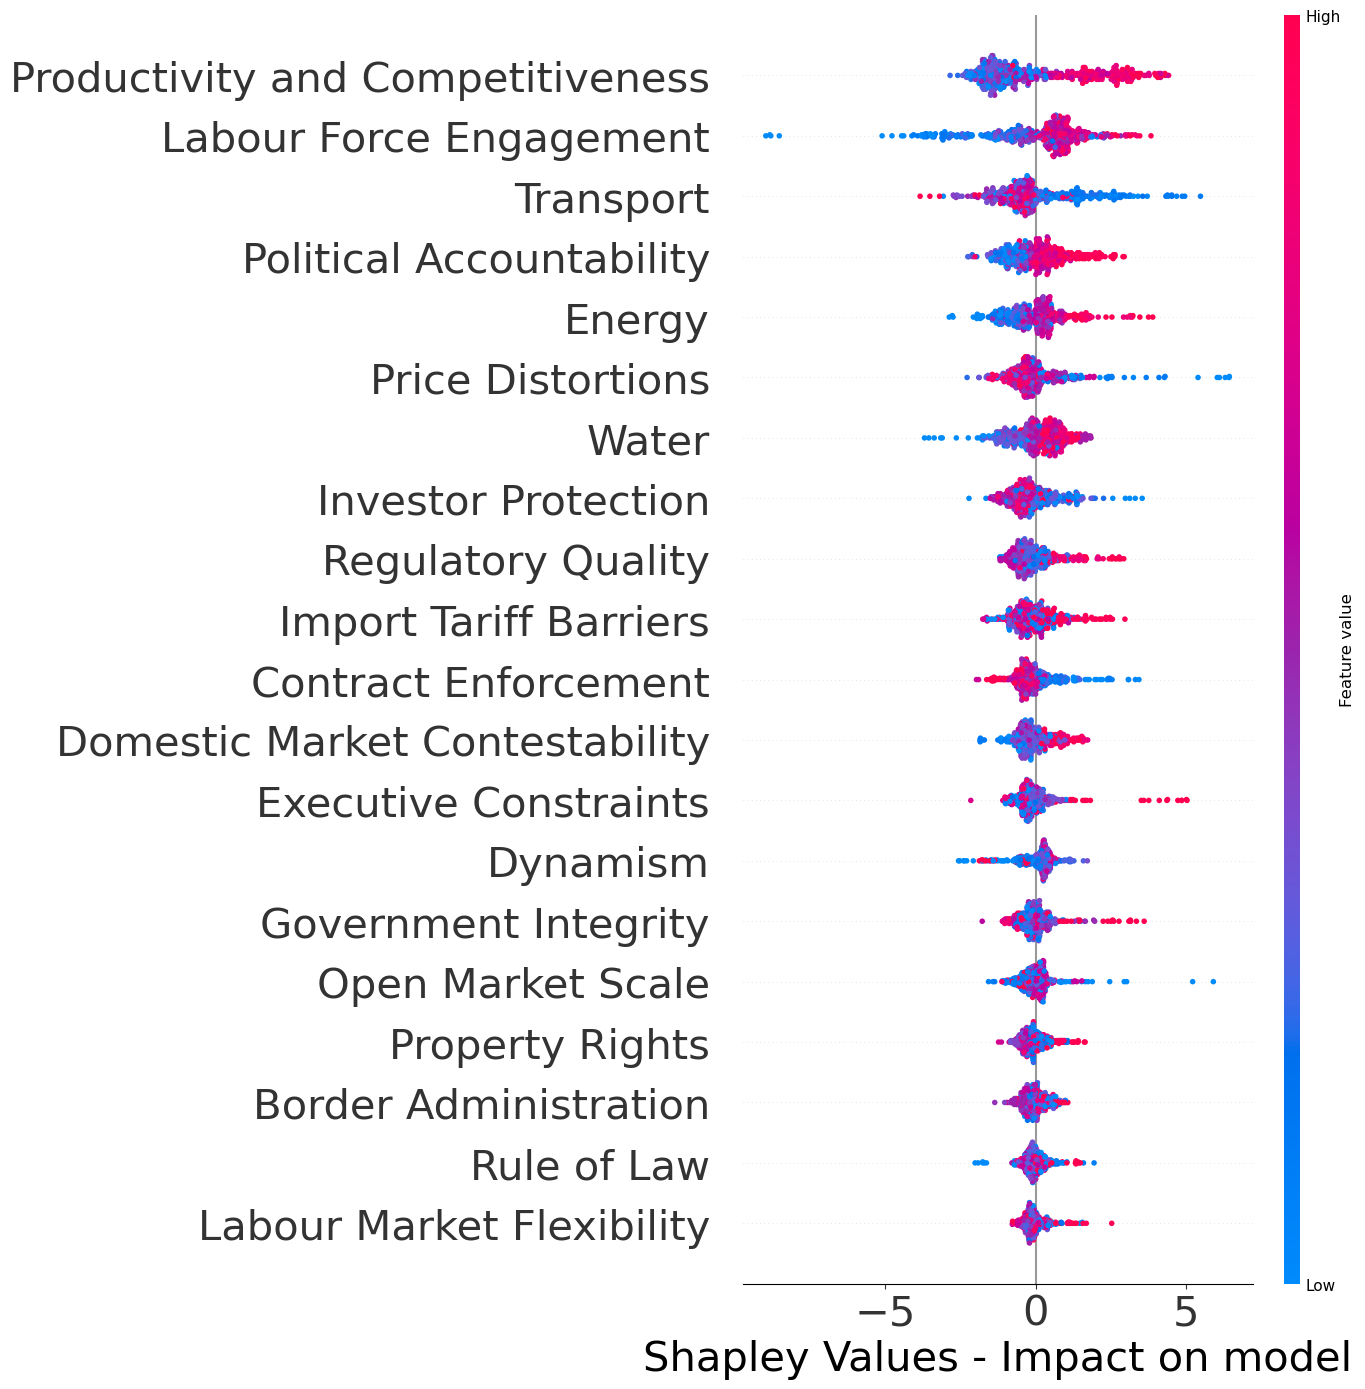

In [72]:
# ----------------------------------------------------------------------------------------------------------------------
# Global SHAP analysis
# ----------------------------------------------------------------------------------------------------------------------
explainer   = shap.TreeExplainer(ForestLandSoil_ETR_M3, X_test_ETR_M3)
shap_values = explainer.shap_values(X_test_ETR_M3)

Features    = feature_vars #df_Features_test.columns.tolist()

shap.summary_plot(shap_values, X_test_ETR_M3, Features, plot_size=(14,14), show=False)
plt.xlabel('Shapley Values - Impact on model', fontsize=30)
plt.tick_params(labelsize=30)
plt.tight_layout(pad=1.08)

plt.savefig(f'{path_to_save}/Feature Importance_ERT_Model3.tiff', format='tiff', dpi=300, bbox_inches ='tight')

plt.show()

### <font color='slateblue'> Local SHAP analysis 

In [74]:
df_DataBase_condensed_clone_2.columns

Index(['Emissions', 'Exposure to Air Pollution', 'Forest, Land and Soil',
       'Freshwater', 'Preservation Efforts', 'Executive Constraints',
       'Political Accountability', 'Rule of Law', 'Government Integrity',
       'Government Effectiveness', 'Regulatory Quality', 'Property Rights',
       'Investor Protection', 'Contract Enforcement', 'Financing Ecosystem',
       'Restrictions on International Investment',
       'Domestic Market Contestability', 'Environment for Business Creation',
       'Burden of Regulation', 'Labour Market Flexibility',
       'Price Distortions', 'Fiscal Sustainability', 'Macroeconomic Stability',
       'Productivity and Competitiveness', 'Dynamism',
       'Labour Force Engagement', 'Communications', 'Energy', 'Water',
       'Transport', 'Border Administration', 'Open Market Scale',
       'Import Tariff Barriers', 'Market Distortions', 'Temperature_change'],
      dtype='object')

In [75]:
feature_vars

['Executive Constraints',
 'Political Accountability',
 'Rule of Law',
 'Government Integrity',
 'Government Effectiveness',
 'Regulatory Quality',
 'Property Rights',
 'Investor Protection',
 'Contract Enforcement',
 'Financing Ecosystem',
 'Restrictions on International Investment',
 'Domestic Market Contestability',
 'Environment for Business Creation',
 'Burden of Regulation',
 'Labour Market Flexibility',
 'Price Distortions',
 'Fiscal Sustainability',
 'Macroeconomic Stability',
 'Productivity and Competitiveness',
 'Dynamism',
 'Labour Force Engagement',
 'Communications',
 'Energy',
 'Water',
 'Transport',
 'Border Administration',
 'Open Market Scale',
 'Import Tariff Barriers',
 'Market Distortions']

In [76]:
def SHAP_Tree_Explainer_Local(reg_data, df, filename, variable_1, variable_2, Features, fname):
    explainer    = shap.TreeExplainer(reg_data)
    shap_values  = explainer.shap_values(df[Features].to_numpy())
    df_shap_plot = []
    df_shap_plot = df.copy()
    
    # local explanation
    fig = plt.figure(figsize=(6,3.3),dpi=300)
    ax1 = fig.add_subplot(1,1,1)
    
    shap.dependence_plot(variable_1,shap_values, df_shap_plot[Features].to_numpy(),Features, ax=ax1, show=False,
                     interaction_index = variable_1)
       
    plt.savefig(f'{path_to_save}/{fname}.jpeg', format='jpeg', dpi=300, bbox_inches ='tight')

    plt.show()
    
    return [shap_values, df_shap_plot]

### <font color='slateblue'> ERT

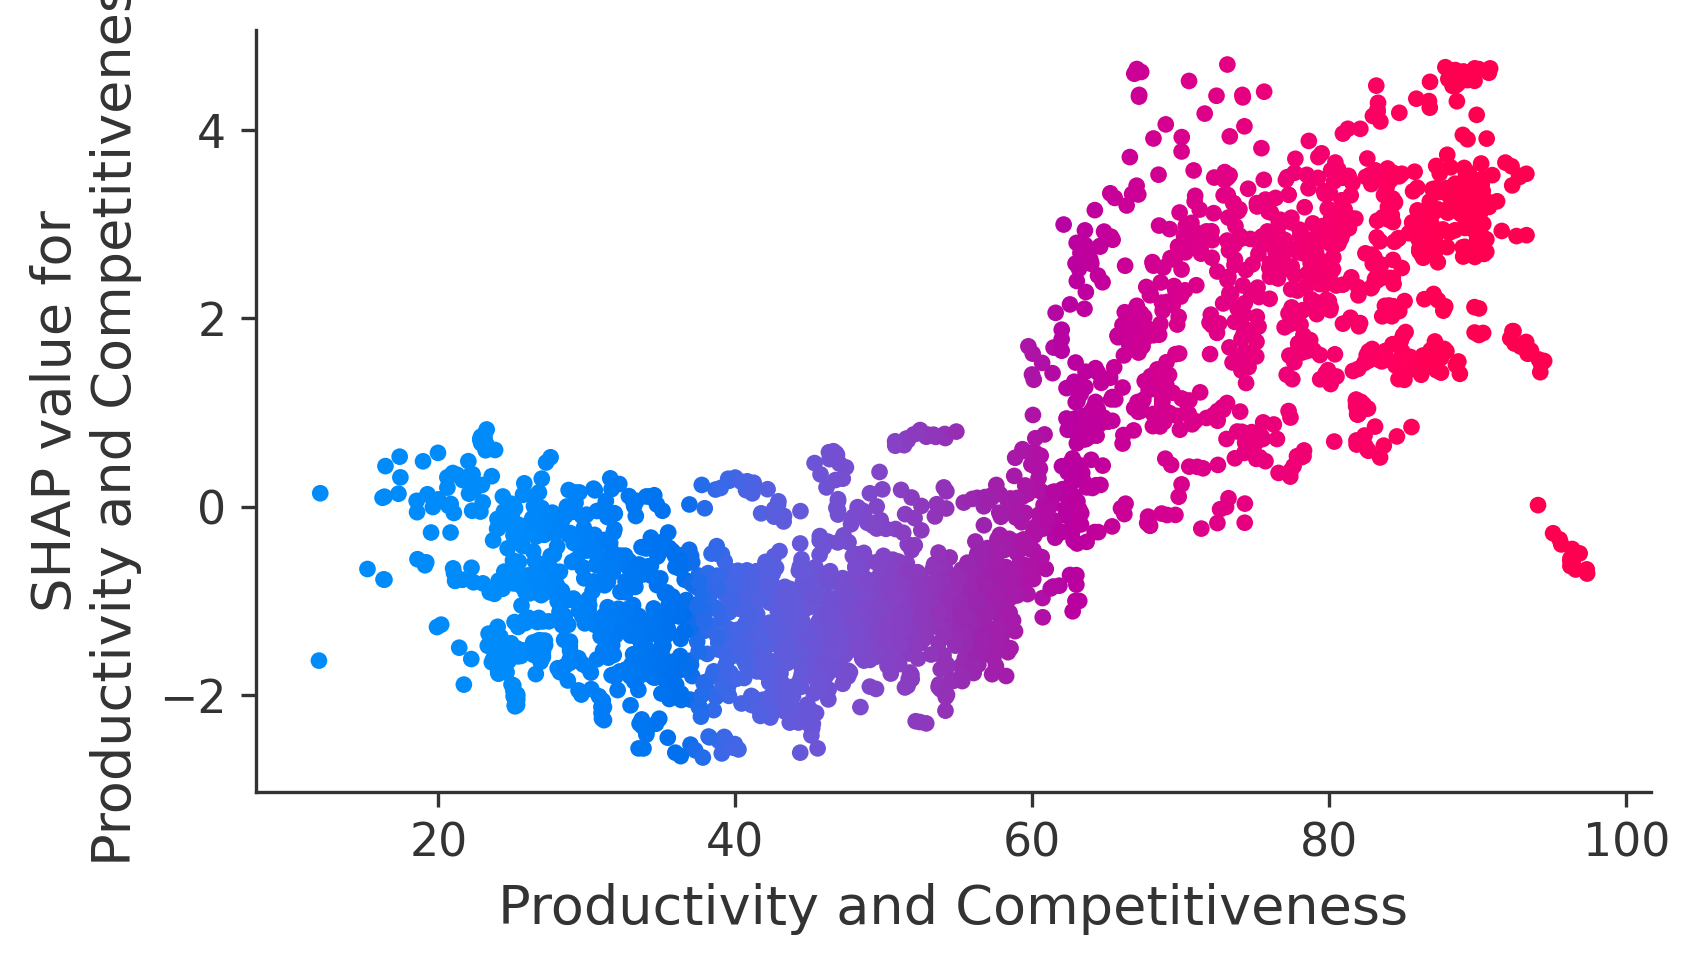

In [78]:
output_file    = 'SHAP_ETR_local_Prod_Comp_FLS'
DataFrame      = df_DataBase_condensed_clone_2

Variable_1     = 'Productivity and Competitiveness'
Variable_2     = 'Productivity and Competitiveness'

fname          = 'M3_ERT_Prod_Comp'

shap_values, df_shap_plot = SHAP_Tree_Explainer_Local(ForestLandSoil_ETR_M3, DataFrame, output_file, \
                                                      Variable_1, Variable_2, feature_vars, fname)

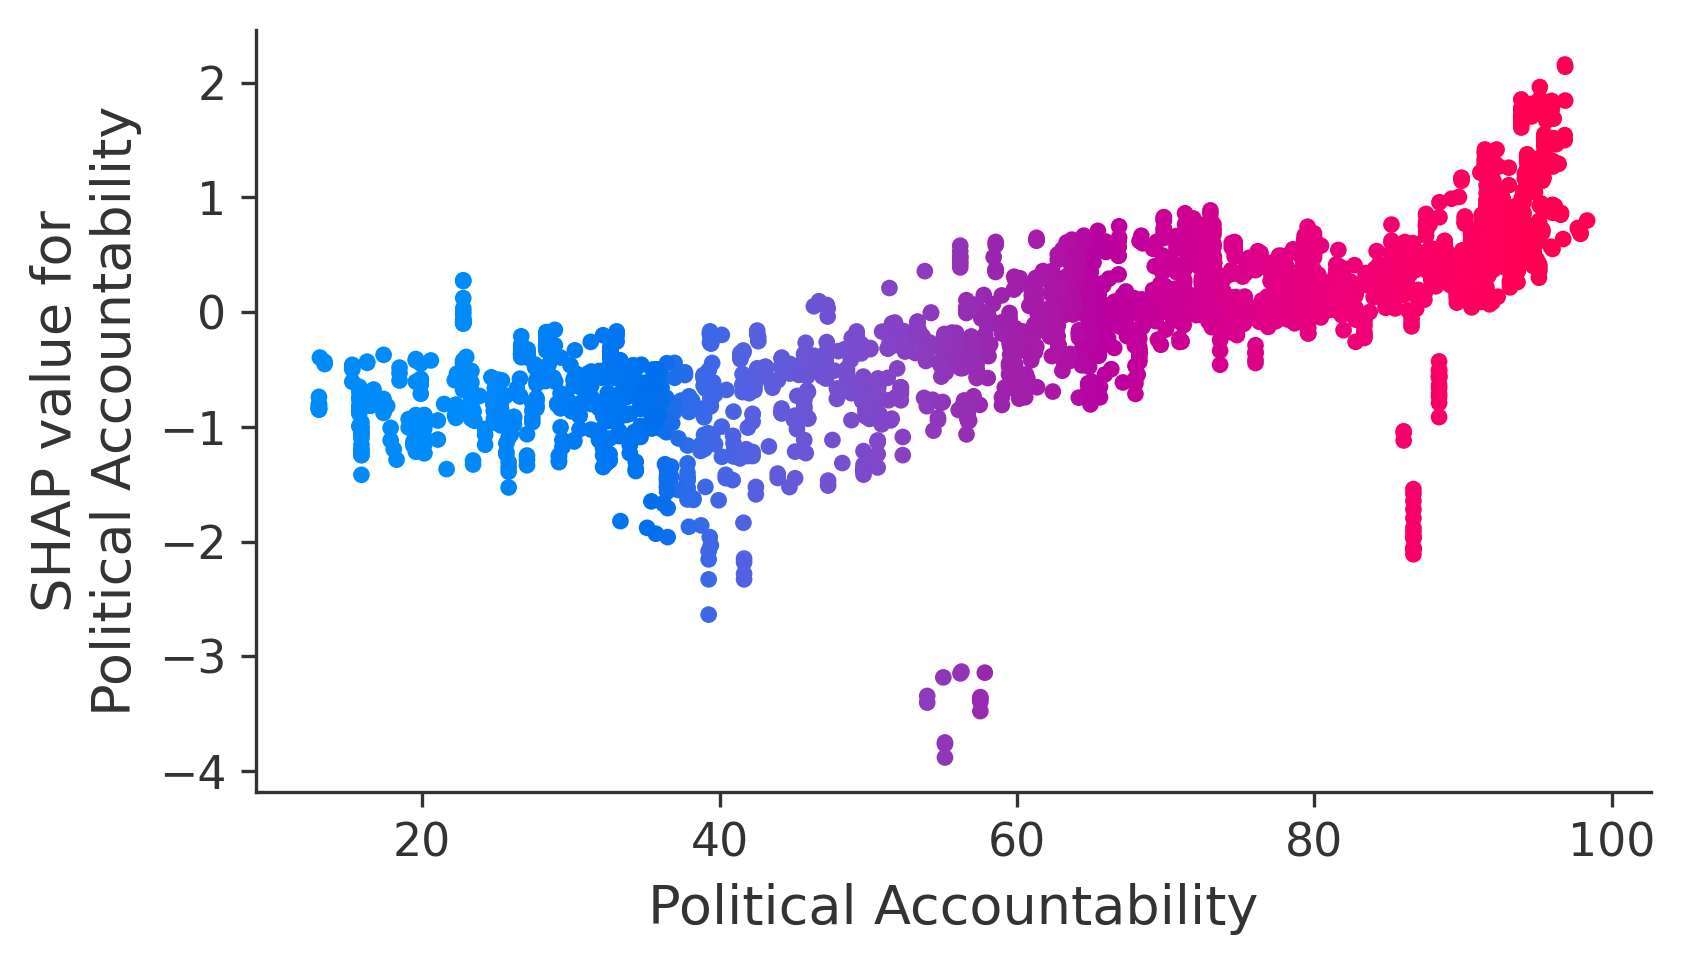

In [79]:
output_file    = 'SHAP_ETR_local_Political Accountability_FLS'
DataFrame      = df_DataBase_condensed_clone_2

Variable_1     = 'Political Accountability'
Variable_2     = 'Political Accountability'

fname          = 'M3_ERT_Polit_Accnt'

shap_values, df_shap_plot = SHAP_Tree_Explainer_Local(ForestLandSoil_ETR_M3, DataFrame, output_file, \
                                                      Variable_1, Variable_2, feature_vars, fname)

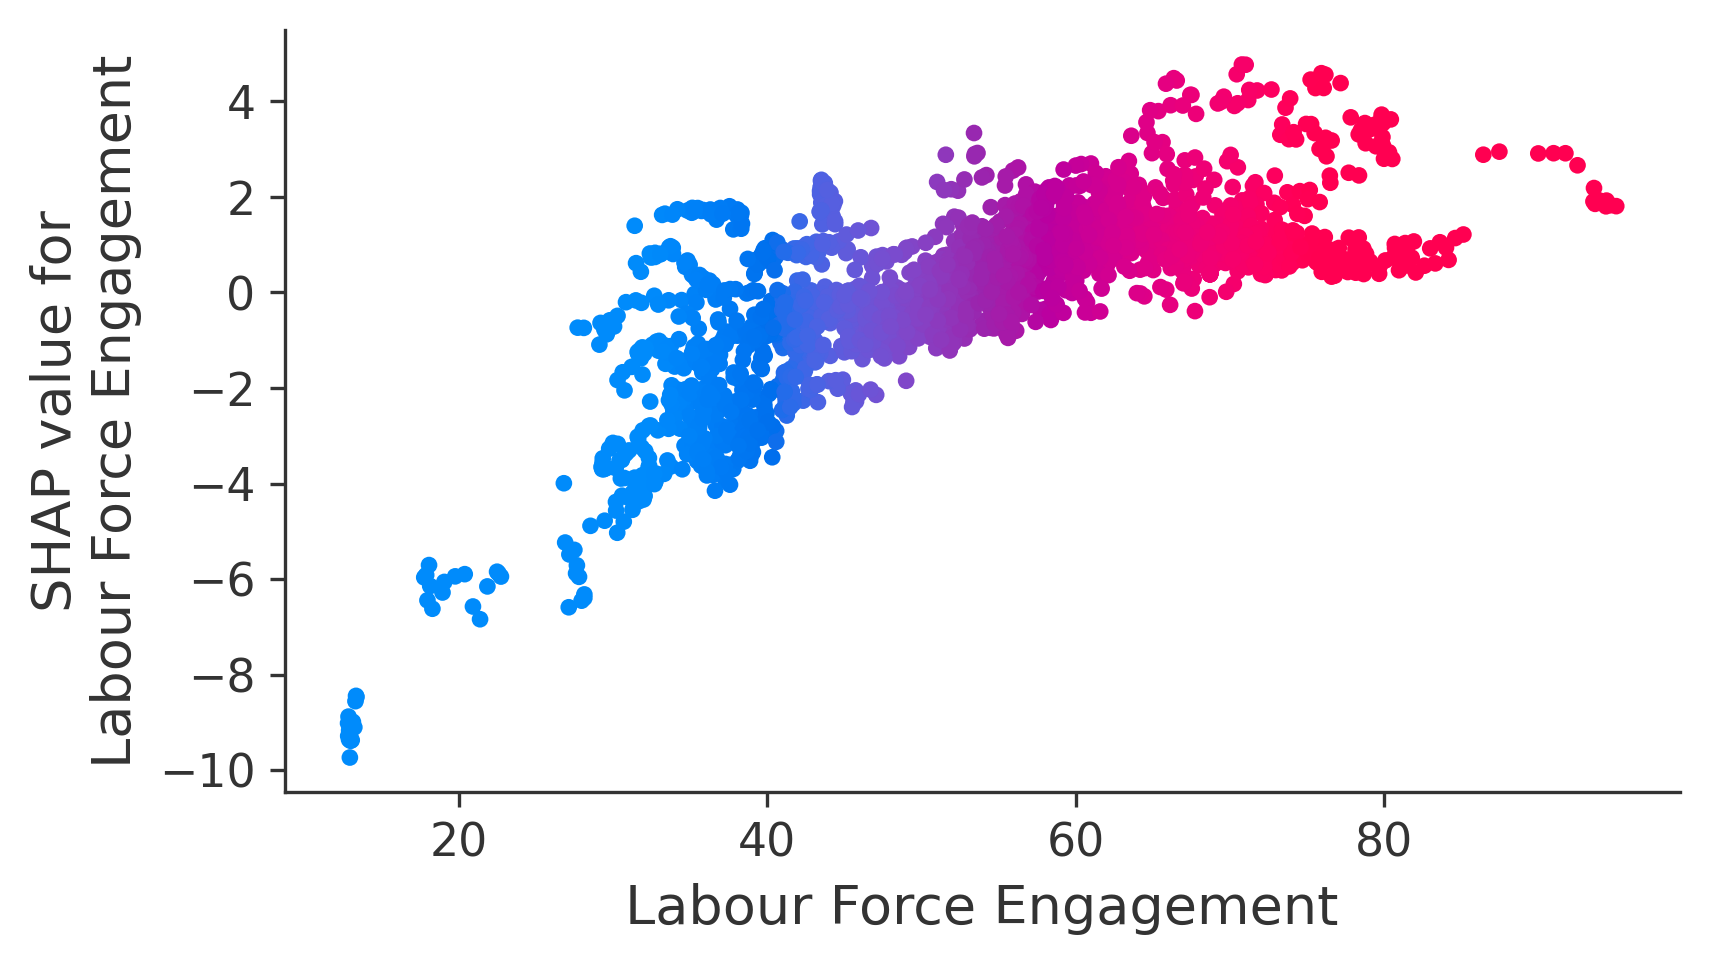

In [80]:
output_file    = 'SHAP_ETR_Labour Force Engagement_FLS'
DataFrame      = df_DataBase_condensed_clone_2

Variable_1     = 'Labour Force Engagement'
Variable_2     = 'Labour Force Engagement'

fname          = 'M3_ERT_Labor_Force'

shap_values, df_shap_plot = SHAP_Tree_Explainer_Local(ForestLandSoil_ETR_M3, DataFrame, output_file, \
                                                      Variable_1, Variable_2, feature_vars, fname)

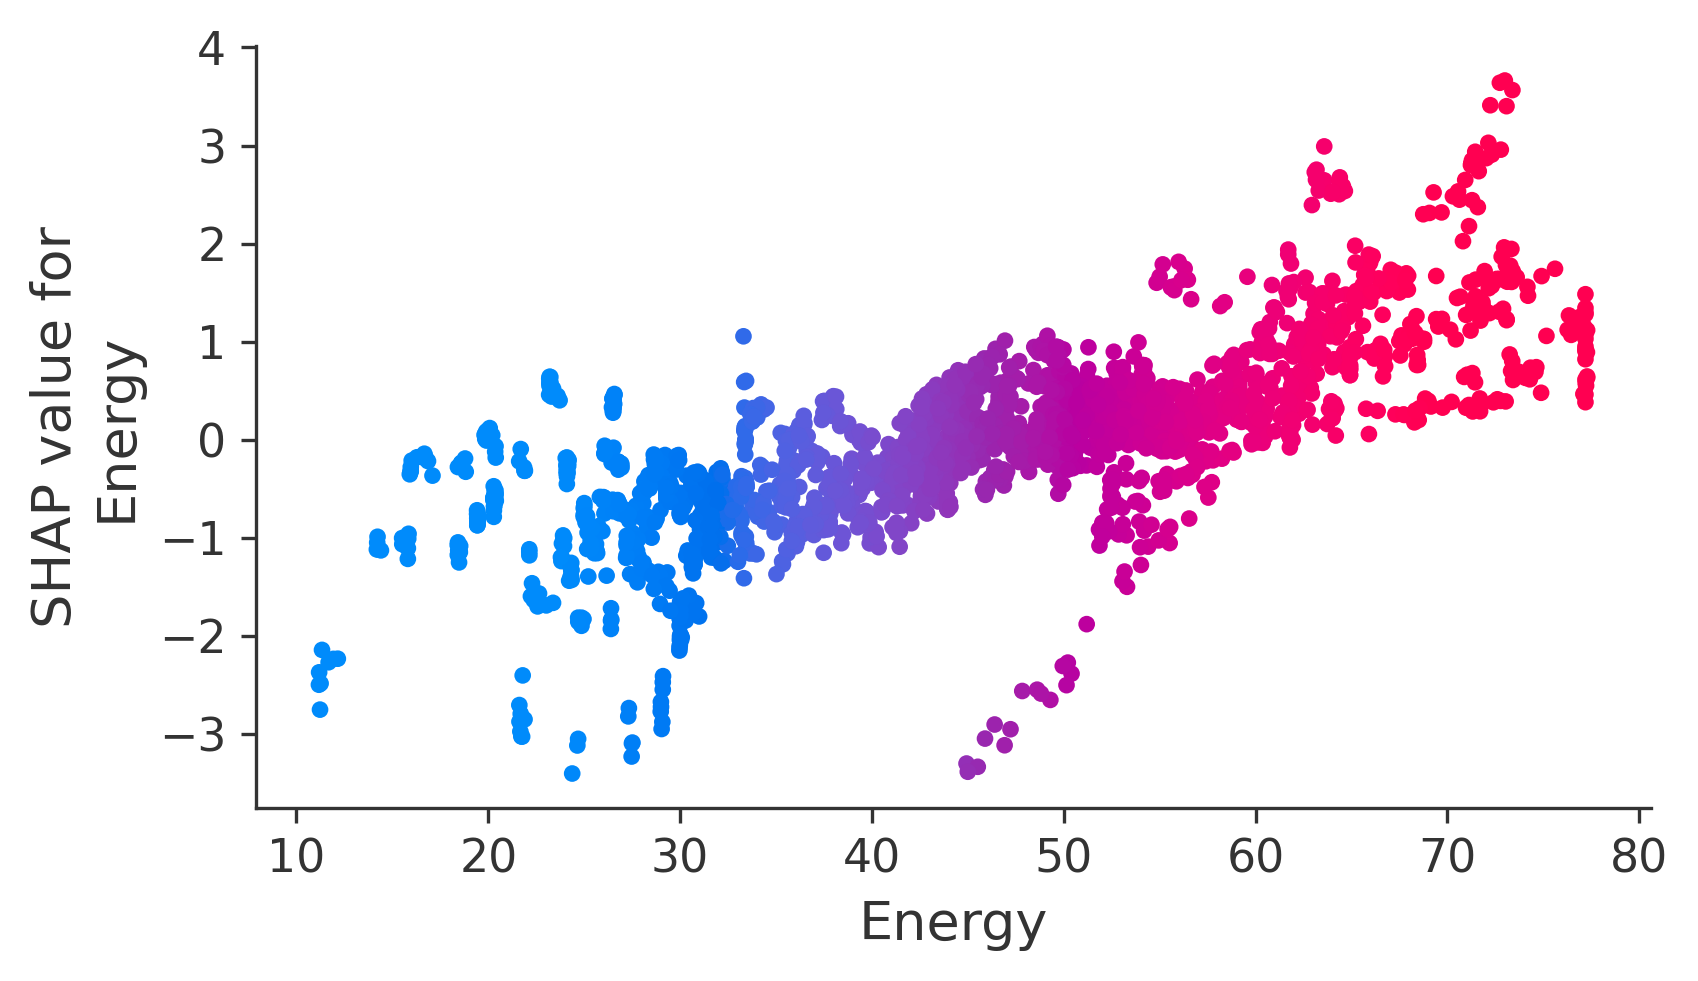

In [81]:
output_file    = 'SHAP_ETR_local_Energy_FLS'
DataFrame      = df_DataBase_condensed_clone_2

Variable_1     = 'Energy'
Variable_2     = 'Energy'

fname          = 'M3_ERT_Energy'

shap_values, df_shap_plot = SHAP_Tree_Explainer_Local(ForestLandSoil_ETR_M3, DataFrame, output_file, \
                                                      Variable_1, Variable_2, feature_vars, fname)

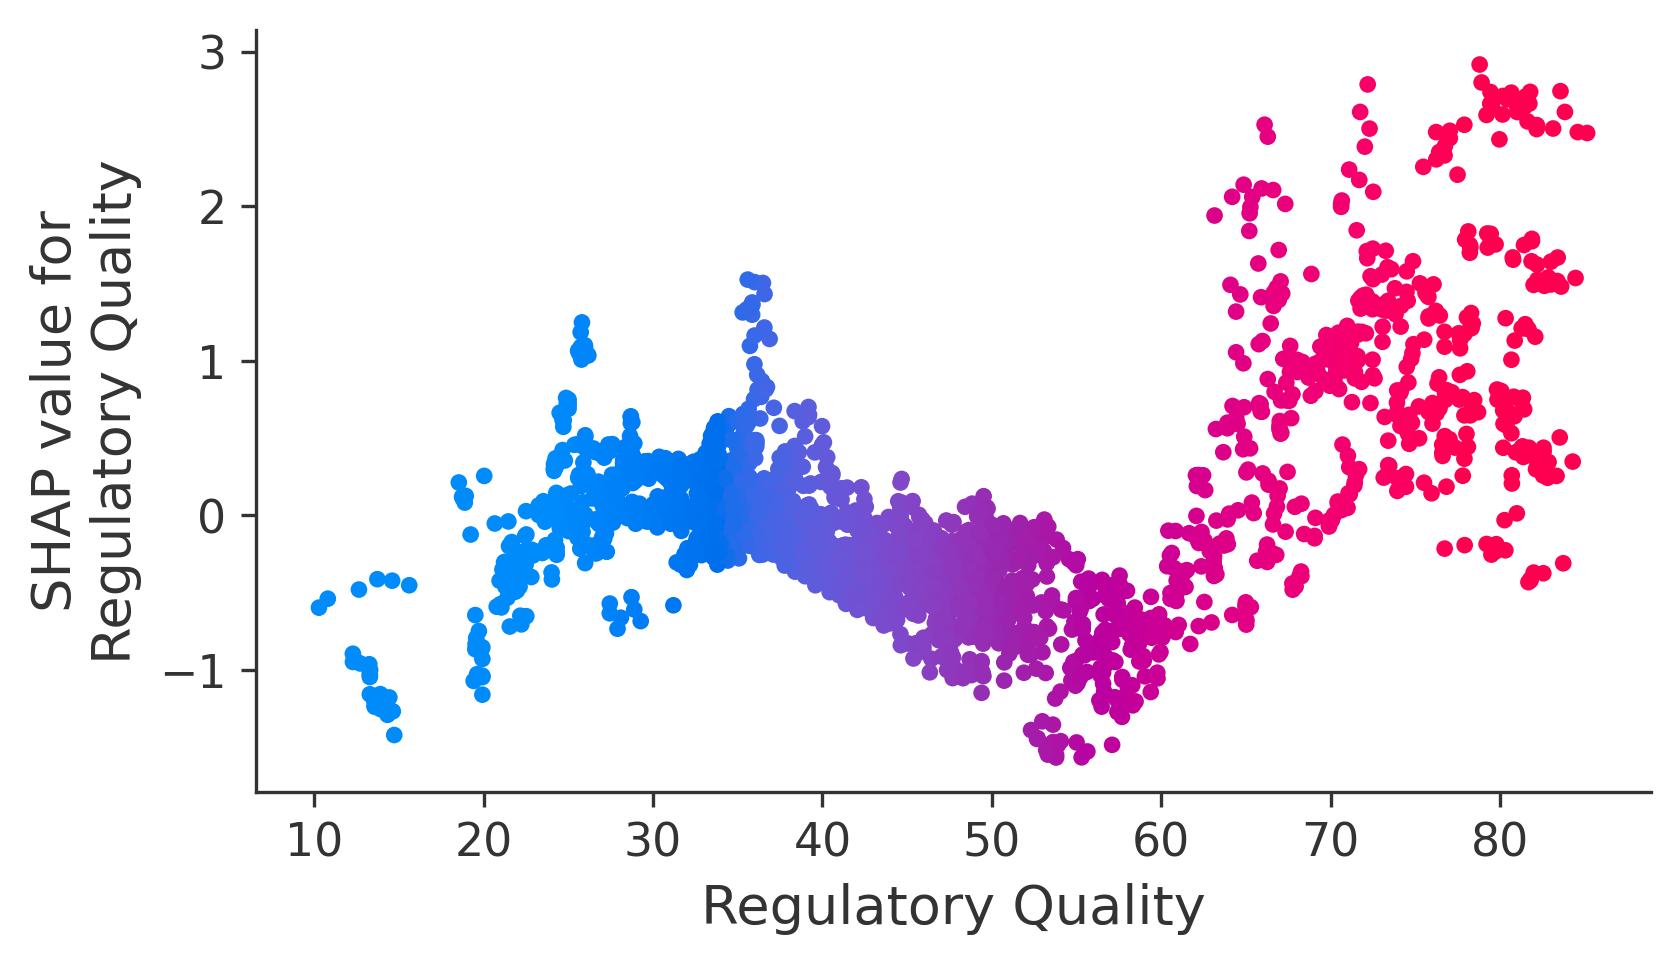

In [82]:
output_file    = 'SHAP_ETR_Regulatory Quality_FLS'
DataFrame      = df_DataBase_condensed_clone_2

Variable_1     = 'Regulatory Quality'
Variable_2     = 'Regulatory Quality'

fname          = 'M3_ERT_regulatory_Quality'

shap_values, df_shap_plot = SHAP_Tree_Explainer_Local(ForestLandSoil_ETR_M3, DataFrame, output_file, \
                                                      Variable_1, Variable_2, feature_vars, fname)

In [83]:
df_DataBase_condensed_clone_2

Emissions  Exposure to Air Pollution  Forest, Land and Soil  Freshwater  \
0     84.709027                  77.019233              27.654281   39.233396   
1     73.164301                  75.677545              37.856287   50.715009   
2     70.523915                  61.830966              31.411565   46.818647   
3     71.259956                  74.057277              55.309896   50.413274   
4     62.864388                  86.106625              52.019060   57.943408   
...         ...                        ...                    ...         ...   
2563  64.923077                  77.829900              30.679833   48.276750   
2564  70.456853                  70.110608              47.467474   77.216043   
2565  67.994735                  83.627241              32.787558   50.429156   
2566  61.253840                  74.288401              38.193138   57.582027   
2567  80.648132                  91.785618              52.808211   76.412131   

      Preservation Efforts  Executive Constraints  Political Accountability  \
0                14.190192              32.848882                 34.270532   
1                34.915049              52.101720                 76.828351   
2                36.690163              42.688856                 45.691339   
3                16.415135              31.361587                 33.077061   
4                35.728607              42.342829                 79.363021   
...                    ...                    ...                       ...   
2563             36.826756              21.483845                 35.439847   
2564             65.205286              59.484895                 73.103044   
2565             55.133269              23.230460                 26.170563   
2566             53.901070              79.481964                 95.096158   
2567             69.181892              69.750643                 94.266402   

      Rule of Law  Government Integrity  Government Effectiveness  ...  \
0       32.411973             20.123564                 29.118566  ...   
1       41.126615             33.256320                 48.715803  ...   
2       44.065657             38.642278                 34.087929  ...   
3       33.555283             25.042299                 21.974902  ...   
4       37.737702             47.550149                 56.598444  ...   
...           ...                   ...                       ...  ...   
2563    22.111596             13.934678                  7.935615  ...   
2564    68.160626             82.994083                 93.970848  ...   
2565    36.206372             46.403364                 37.955325  ...   
2566    68.111022             80.285953                 80.835227  ...   
2567    67.000650             85.632767                 90.064532  ...   

      Labour Force Engagement  Communications     Energy      Water  \
0                   17.773019       23.686349  20.392296  29.316259   
1                   37.459121       37.782016  32.979801  55.298845   
2                   32.097723       33.284729  36.995082  68.148611   
3                   57.653726       28.304623  18.418403  30.751788   
4                   54.488624       44.707247  45.918696  44.459535   
...                       ...             ...        ...        ...   
2563                34.674331       23.192454  41.175572  42.645229   
2564                68.953609       96.363574  54.784790  84.009743   
2565                63.952546       67.766153  43.903035  55.705097   
2566                68.697052       84.861073  61.790838  78.437674   
2567                64.975101       88.222634  57.512978  83.234934   

      Transport  Border Administration  Open Market Scale  \
0     15.720431              34.796677          14.060497   
1     27.504373              57.387743          45.475710   
2     32.301267              33.744312          32.814198   
3     24.271519              35.149397          14.382750   
4     41.450412              52.27726

### <font color='slateblue'> Countries

In [85]:
df_DataBase.head(3)

Country   ID                          Area  IDn  Year  Emissions  \
0  Afghanistan  AFG        Central and South Asia    1  2007  84.709027   
1      Albania  ALB                Eastern Europe    2  2007  73.164301   
2      Algeria  DZA  Middle East and North Africa    3  2007  70.523915   

   Exposure to Air Pollution  Forest, Land and Soil  Freshwater  \
0                  77.019233              27.654281   39.233396   
1                  75.677545              37.856287   50.715009   
2                  61.830966              31.411565   46.818647   

   Preservation Efforts  ...  Transport  Border Administration  \
0             14.190192  ...  15.720431              34.796677   
1             34.915049  ...  27.504373              57.387743   
2             36.690163  ...  32.301267              33.744312   

   Open Market Scale  Import Tariff Barriers  Market Distortions  \
0          14.060497               37.648227           63.021531   
1          45.475710               85.469546           65.301810   
2          32.814198               34.089933           46.426063   

   Temperature_change  Climate-driven INFORM Risk Indicator   \
0               0.675                                    NaN   
1               1.316                                    NaN   
2               1.220                                    NaN   

   Climate-driven Hazard & Exposure    Lack of coping capacity   \
0                                 NaN                       NaN   
1                                 NaN                       NaN   
2                                 NaN                       NaN   

   Vulnerability   
0             NaN  
1             NaN  
2             NaN  

[3 rows x 44 columns]

In [86]:
# median value calculator for countries

def median_value_calc(df, ref_var, time_period):
    # Select only numeric columns
    numeric_df            = []
    numeric_df            = df.select_dtypes(include='number')

    # Include the 'Country' column for grouping
    numeric_df[ref_var] = df[ref_var]

    # Group by reference variable and calculate the median for numeric columns
    median_values         = numeric_df.groupby(ref_var).median()
    median_values['Year'] = time_period
    return median_values

### median values

In [88]:
df                       = df_DataBase
ref_var                  = 'Country'
time_period              = 'Entire_Data'

median_values = []
median_values = median_value_calc(df, ref_var, time_period)
median_values.head(3)

IDn         Year  Emissions  Exposure to Air Pollution  \
Country                                                               
Afghanistan  1.0  Entire_Data  76.499268                  70.530090   
Albania      2.0  Entire_Data  74.662358                  79.548893   
Algeria      3.0  Entire_Data  68.904672                  66.383731   

             Forest, Land and Soil  Freshwater  Preservation Efforts  \
Country                                                                
Afghanistan              29.194726   40.197595             11.370038   
Albania                  39.187520   53.329485             43.345971   
Algeria                  32.872914   43.287751             36.984985   

             Executive Constraints  Political Accountability  Rule of Law  \
Country                                                                     
Afghanistan              32.848882                 32.031748    32.411973   
Albania                  52.101720                 74.253968    40.876095   
Algeria                  42.688856                 45.691339    43.830827   

             ...  Transport  Border Administration  Open Market Scale  \
Country      ...                                                        
Afghanistan  ...  21.195208              34.796677          14.979873   
Albania      ...  36.858495              56.306360          43.234445   
Algeria      ...  35.278505              42.469710          32.783313   

             Import Tariff Barriers  Market Distortions  Temperature_change  \
Country                                                                       
Afghanistan               37.648227           36.877740              1.1870   
Albania                   85.469546           77.357666              1.3985   
Algeria                   34.089933           42.872356              1.3090   

             Climate-driven INFORM Risk Indicator   \
Country                                              
Afghanistan                                    7.2   
Albania                                        3.2   
Algeria                                        3.3   

             Climate-driven Hazard & Exposure    Lack of coping capacity   \
Country                                                                     
Afghanistan                                 6.3                      7.25   
Albania                                     4.3                      4.35   
Algeria                                     2.8                      4.45   

             Vulnerability   
Country                      
Afghanistan             8.0  
Albania                 1.7  
Algeria                 2.9  

[3 rows x 41 columns]

### Analysis

In [90]:
conditions = []

condition_1 = median_values['Productivity and Competitiveness'] >= 60
condition_2 = median_values['Political Accountability'] >= 60
condition_3 = median_values['Labour Force Engagement'] >= 50
condition_4 = median_values['Energy'] >= 59
condition_5 = median_values['Regulatory Quality'] >= 62

conditions = condition_1 & condition_2 & condition_3 & condition_4 & condition_5

# Apply the conditions to the DataFrame
filtered_df = median_values[conditions]

# Get the unique index values of the filtered DataFrame
countries = []
countries = filtered_df.index.unique()

countries_list = []
countries_list = countries.tolist()

print('Countries protecting their Forest, Land, Soil:', ', '.join(countries_list))


Countries protecting their Forest, Land, Soil: Australia, Austria, Canada, Denmark, Finland, Iceland, Japan, Luxembourg, Norway, Sweden, Switzerland, Taiwan, United States


In [91]:
condition = []

# Assuming median_values_pre_covid is a DataFrame
condition = median_values.index == 'Spain'

# Use the condition to filter the DataFrame and select multiple columns
values = median_values.loc[condition, ['Productivity and Competitiveness', \
                                       'Political Accountability', \
                                       'Labour Force Engagement', \
                                       'Energy', \
                                       'Regulatory Quality']]

# If you expect a single row and want to extract the values as a Series or a list
if not values.empty:
    values = values.iloc[0]  # This gives you a Series
    values_list = values.tolist()  # Convert to a list if needed
else:
    values = None  # Handle the case when there are no matching entries

values

Productivity and Competitiveness    74.375194
Political Accountability            89.572195
Labour Force Engagement             57.267125
Energy                              58.166057
Regulatory Quality                  57.700825
Name: Spain, dtype: float64

## <font color='slateblue'> Evironmental Model 1.4 - "Freshwater" 

### <font color='slateblue'> 1.4.1 RF

In [94]:
df               = df_DataBase_condensed_clone_2
target_var_index = 3
rem_features     = {0, 1, 2, 3, 4, 34}
test_data_frac   = 0.2
random_state     = 5
Freshwater_RF_M4, X_test_RF_M4, y_test_RF_M4, Y_Test_Pred_RF_M4, metric_RF_M4, len_TestData, feature_vars = \
                       RF_Regressor(df, target_var_index, rem_features, test_data_frac, random_state)


Predictors: ['Executive Constraints', 'Political Accountability', 'Rule of Law', 'Government Integrity', 'Government Effectiveness', 'Regulatory Quality', 'Property Rights', 'Investor Protection', 'Contract Enforcement', 'Financing Ecosystem', 'Restrictions on International Investment', 'Domestic Market Contestability', 'Environment for Business Creation', 'Burden of Regulation', 'Labour Market Flexibility', 'Price Distortions', 'Fiscal Sustainability', 'Macroeconomic Stability', 'Productivity and Competitiveness', 'Dynamism', 'Labour Force Engagement', 'Communications', 'Energy', 'Water', 'Transport', 'Border Administration', 'Open Market Scale', 'Import Tariff Barriers', 'Market Distortions']

Target Variable :  Freshwater
----------------------------
Time taken to train the model: 0.05 minutes
############ Model Accuracy ############
RMSE: 0.954 [unit]
MAE: 0.633 [unit]
R-squared: 0.996
########################################
 
############ Model Accuracy ############
RMSE: 2.474 

### <font color='slateblue'> 1.4.2 XGBoost

In [96]:
df               = df_DataBase_condensed_clone_2
target_var_index = 3
rem_features     = {0, 1, 2, 3, 4, 34}
test_data_frac   = 0.2
random_state     = 5

Freshwater_XGB_M4, X_test_XGB_M4, y_test_XGB_M4, Y_Test_Pred_XGB_M4, metric_XGB_M4, len_TestData, feature_vars = \
                      XGBoost_Regressor(df, target_var_index, rem_features, test_data_frac, random_state)


Predictors: ['Executive Constraints', 'Political Accountability', 'Rule of Law', 'Government Integrity', 'Government Effectiveness', 'Regulatory Quality', 'Property Rights', 'Investor Protection', 'Contract Enforcement', 'Financing Ecosystem', 'Restrictions on International Investment', 'Domestic Market Contestability', 'Environment for Business Creation', 'Burden of Regulation', 'Labour Market Flexibility', 'Price Distortions', 'Fiscal Sustainability', 'Macroeconomic Stability', 'Productivity and Competitiveness', 'Dynamism', 'Labour Force Engagement', 'Communications', 'Energy', 'Water', 'Transport', 'Border Administration', 'Open Market Scale', 'Import Tariff Barriers', 'Market Distortions']

Target Variable :  Freshwater
----------------------------
Time taken to train the model: 0.00 minutes
############ Model Accuracy ############
RMSE: 0.319 [unit]
MAE: 0.234 [unit]
R-squared: 1.000
########################################
 
############ Model Accuracy ############
RMSE: 2.573 

### <font color='slateblue'> 1.2.3 HGBoost

In [98]:
df               = df_DataBase_condensed_clone_2
target_var_index = 3
rem_features     = {0, 1, 2, 3, 4, 34}
test_data_frac   = 0.2
random_state     = 5

Freshwater_HGB_M4, X_test_HGB_M4, y_test_HGB_M4, Y_Test_Pred_HGB_M4, metric_HGB_M4, len_TestData, feature_vars = \
                      HGBoost_Regressor(df, target_var_index, rem_features, test_data_frac, random_state)


Predictors: ['Executive Constraints', 'Political Accountability', 'Rule of Law', 'Government Integrity', 'Government Effectiveness', 'Regulatory Quality', 'Property Rights', 'Investor Protection', 'Contract Enforcement', 'Financing Ecosystem', 'Restrictions on International Investment', 'Domestic Market Contestability', 'Environment for Business Creation', 'Burden of Regulation', 'Labour Market Flexibility', 'Price Distortions', 'Fiscal Sustainability', 'Macroeconomic Stability', 'Productivity and Competitiveness', 'Dynamism', 'Labour Force Engagement', 'Communications', 'Energy', 'Water', 'Transport', 'Border Administration', 'Open Market Scale', 'Import Tariff Barriers', 'Market Distortions']

Target Variable :  Freshwater
----------------------------
Time taken to train the model: 0.00 minutes
############ Model Accuracy ############
RMSE: 1.145 [unit]
MAE: 0.844 [unit]
R-squared: 0.995
########################################
 
############ Model Accuracy ############
RMSE: 2.548 

### <font color='slateblue'> 1.2.4 ERT

In [100]:
df               = df_DataBase_condensed_clone_2
target_var_index = 3
rem_features     = {0, 1, 2, 3, 4, 34}
test_data_frac   = 0.2
random_state     = 5

Freshwater_ETR_M4, X_test_ETR_M4, y_test_ETR_M4, Y_Test_Pred_ETR_M4, metric_ETR_M4, len_TestData, feature_vars = \
                      ETR_Regressor(df, target_var_index, rem_features, test_data_frac, random_state)

----------------------------
Predictors: ['Executive Constraints', 'Political Accountability', 'Rule of Law', 'Government Integrity', 'Government Effectiveness', 'Regulatory Quality', 'Property Rights', 'Investor Protection', 'Contract Enforcement', 'Financing Ecosystem', 'Restrictions on International Investment', 'Domestic Market Contestability', 'Environment for Business Creation', 'Burden of Regulation', 'Labour Market Flexibility', 'Price Distortions', 'Fiscal Sustainability', 'Macroeconomic Stability', 'Productivity and Competitiveness', 'Dynamism', 'Labour Force Engagement', 'Communications', 'Energy', 'Water', 'Transport', 'Border Administration', 'Open Market Scale', 'Import Tariff Barriers', 'Market Distortions']

Target Variable :  Freshwater
----------------------------
Time taken to train the model: 0.01 minutes
############ Model Accuracy ############
RMSE: 0.000 [unit]
MAE: 0.000 [unit]
R-squared: 1.000
########################################
 
############ Model Accura

### <font color='slateblue'> Different train:test ratios

In [102]:
df               = df_DataBase_condensed_clone_2
target_var_index = 3
rem_features     = {0, 1, 2, 3, 4, 34}
test_data_frac   = 0.15
random_state     = 5

Freshwater_ETR_M4, X_test_ETR_M4, y_test_ETR_M4, Y_Test_Pred_ETR_M4, metric_ETR_M4, len_TestData, feature_vars = \
                      ETR_Regressor(df, target_var_index, rem_features, test_data_frac, random_state)

----------------------------
Predictors: ['Executive Constraints', 'Political Accountability', 'Rule of Law', 'Government Integrity', 'Government Effectiveness', 'Regulatory Quality', 'Property Rights', 'Investor Protection', 'Contract Enforcement', 'Financing Ecosystem', 'Restrictions on International Investment', 'Domestic Market Contestability', 'Environment for Business Creation', 'Burden of Regulation', 'Labour Market Flexibility', 'Price Distortions', 'Fiscal Sustainability', 'Macroeconomic Stability', 'Productivity and Competitiveness', 'Dynamism', 'Labour Force Engagement', 'Communications', 'Energy', 'Water', 'Transport', 'Border Administration', 'Open Market Scale', 'Import Tariff Barriers', 'Market Distortions']

Target Variable :  Freshwater
----------------------------
Time taken to train the model: 0.02 minutes
############ Model Accuracy ############
RMSE: 0.000 [unit]
MAE: 0.000 [unit]
R-squared: 1.000
########################################
 
############ Model Accura

In [103]:
df               = df_DataBase_condensed_clone_2
target_var_index = 3
rem_features     = {0, 1, 2, 3, 4, 34}
test_data_frac   = 0.25
random_state     = 5

Freshwater_ETR_M4, X_test_ETR_M4, y_test_ETR_M4, Y_Test_Pred_ETR_M4, metric_ETR_M4, len_TestData, feature_vars = \
                      ETR_Regressor(df, target_var_index, rem_features, test_data_frac, random_state)

----------------------------
Predictors: ['Executive Constraints', 'Political Accountability', 'Rule of Law', 'Government Integrity', 'Government Effectiveness', 'Regulatory Quality', 'Property Rights', 'Investor Protection', 'Contract Enforcement', 'Financing Ecosystem', 'Restrictions on International Investment', 'Domestic Market Contestability', 'Environment for Business Creation', 'Burden of Regulation', 'Labour Market Flexibility', 'Price Distortions', 'Fiscal Sustainability', 'Macroeconomic Stability', 'Productivity and Competitiveness', 'Dynamism', 'Labour Force Engagement', 'Communications', 'Energy', 'Water', 'Transport', 'Border Administration', 'Open Market Scale', 'Import Tariff Barriers', 'Market Distortions']

Target Variable :  Freshwater
----------------------------
Time taken to train the model: 0.01 minutes
############ Model Accuracy ############
RMSE: 0.000 [unit]
MAE: 0.000 [unit]
R-squared: 1.000
########################################
 
############ Model Accura

### <font color='slateblue'> back to 80:20 ratio

In [105]:
df               = df_DataBase_condensed_clone_2
target_var_index = 3
rem_features     = {0, 1, 2, 3, 4, 34}
test_data_frac   = 0.20
random_state     = 5

Freshwater_ETR_M4, X_test_ETR_M4, y_test_ETR_M4, Y_Test_Pred_ETR_M4, metric_ETR_M4, len_TestData, feature_vars = \
                      ETR_Regressor(df, target_var_index, rem_features, test_data_frac, random_state)

----------------------------
Predictors: ['Executive Constraints', 'Political Accountability', 'Rule of Law', 'Government Integrity', 'Government Effectiveness', 'Regulatory Quality', 'Property Rights', 'Investor Protection', 'Contract Enforcement', 'Financing Ecosystem', 'Restrictions on International Investment', 'Domestic Market Contestability', 'Environment for Business Creation', 'Burden of Regulation', 'Labour Market Flexibility', 'Price Distortions', 'Fiscal Sustainability', 'Macroeconomic Stability', 'Productivity and Competitiveness', 'Dynamism', 'Labour Force Engagement', 'Communications', 'Energy', 'Water', 'Transport', 'Border Administration', 'Open Market Scale', 'Import Tariff Barriers', 'Market Distortions']

Target Variable :  Freshwater
----------------------------
Time taken to train the model: 0.01 minutes
############ Model Accuracy ############
RMSE: 0.000 [unit]
MAE: 0.000 [unit]
R-squared: 1.000
########################################
 
############ Model Accura

In [106]:
# ----------------------------------------------------------------------------------------------------------------------
# Global SHAP analysis
# ----------------------------------------------------------------------------------------------------------------------
#explainer   = shap.TreeExplainer(Freshwater_XGB_M4, X_test_XGB_M4)
#shap_values = explainer.shap_values(X_test_XGB_M4)

#Features    = feature_vars #df_Features_test.columns.tolist()

#shap.summary_plot(shap_values, X_test_XGB_M4, Features, plot_size=(14,14), show=False)
#plt.xlabel('Shapley Values - Impact on model', fontsize=30)
#plt.tick_params(labelsize=30)
#plt.tight_layout(pad=1.08)

#plt.savefig('Feature Importance_XGB_Model4.tiff', format='tiff', dpi=300, bbox_inches ='tight')

 97%|=================== | 497/514 [00:20<00:00]       

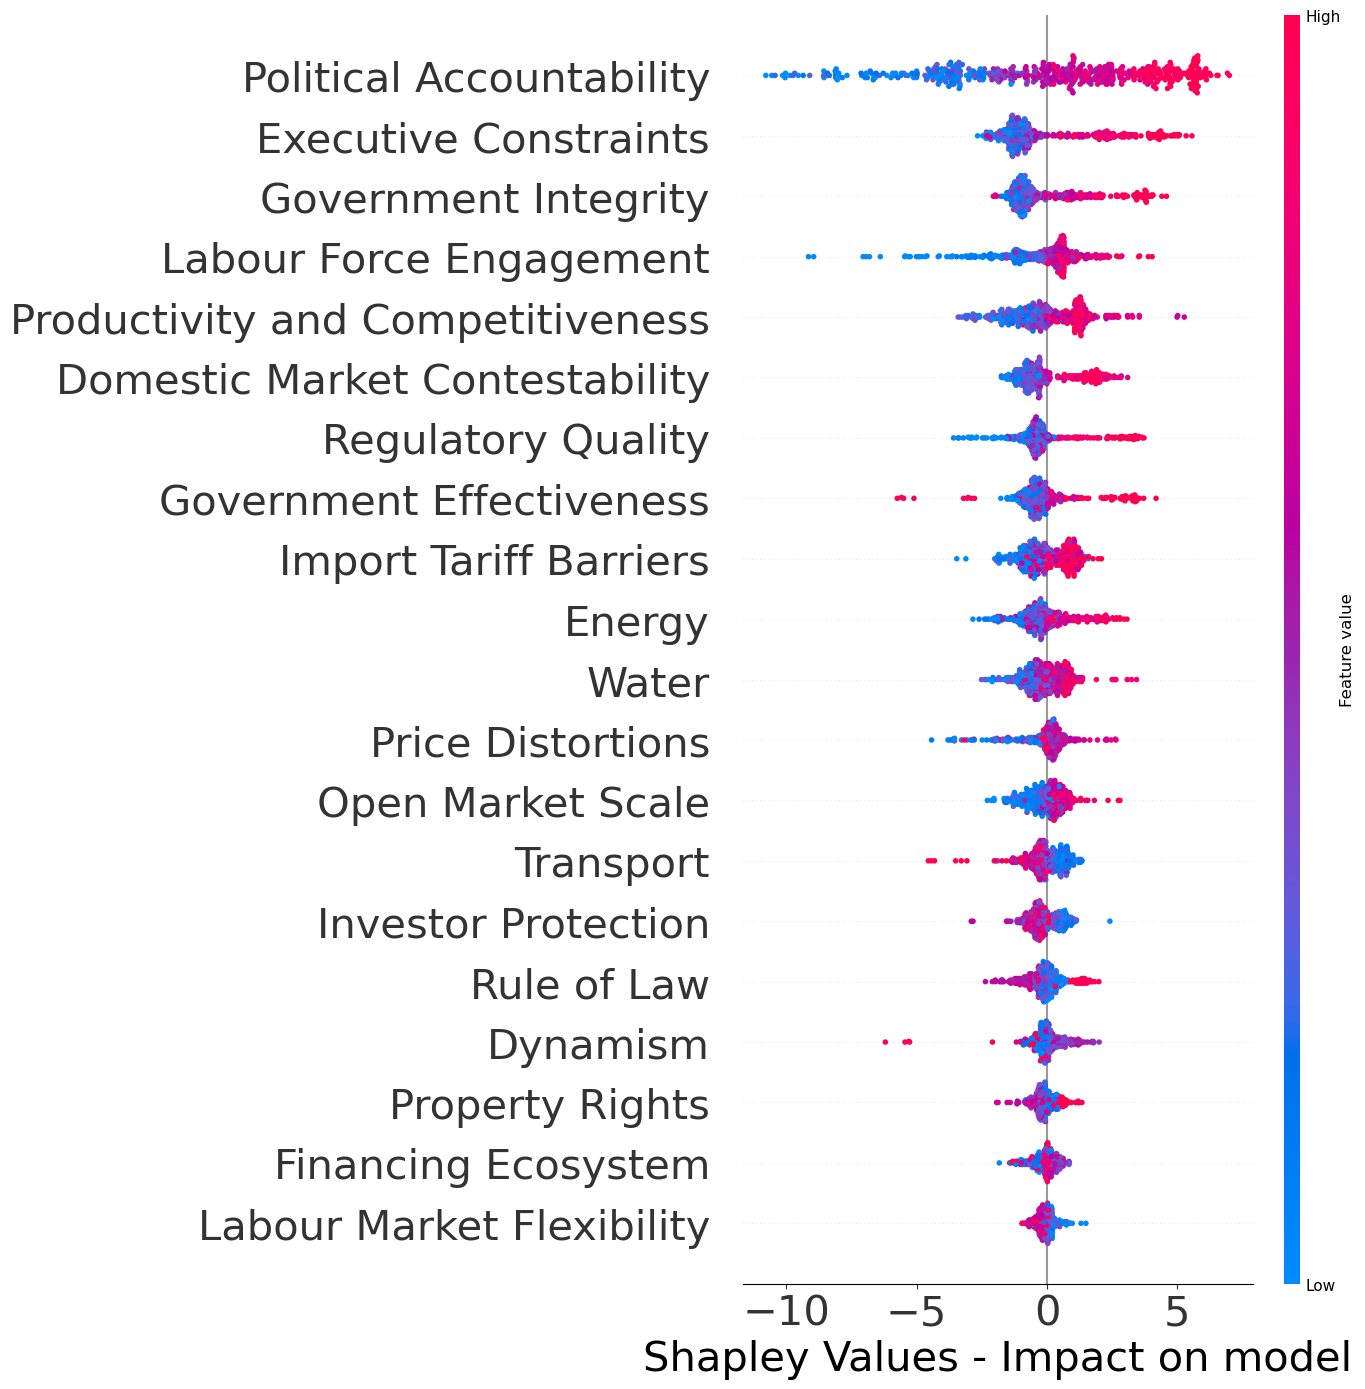

In [107]:
# ----------------------------------------------------------------------------------------------------------------------
# Global SHAP analysis
# ----------------------------------------------------------------------------------------------------------------------
explainer   = shap.TreeExplainer(Freshwater_ETR_M4, X_test_ETR_M4)
shap_values = explainer.shap_values(X_test_ETR_M4)

Features    = feature_vars #df_Features_test.columns.tolist()

shap.summary_plot(shap_values, X_test_ETR_M4, Features, plot_size=(14,14), show=False)
plt.xlabel('Shapley Values - Impact on model', fontsize=30)
plt.tick_params(labelsize=30)
plt.tight_layout(pad=1.08)

plt.savefig(f'{path_to_save}/Feature Importance_ERT_Model4.tiff', format='tiff', dpi=300, bbox_inches ='tight')

plt.show()

In [108]:
# ----------------------------------------------------------------------------------------------------------------------
# Global SHAP analysis
# ----------------------------------------------------------------------------------------------------------------------
#explainer   = shap.TreeExplainer(Freshwater_HGB_M4, X_test_HGB_M4)
#shap_values = explainer.shap_values(X_test_HGB_M4)

#Features    = feature_vars #df_Features_test.columns.tolist()

#shap.summary_plot(shap_values, X_test_HGB_M4, Features, plot_size=(14,14), show=False, check_additivity = False)
#plt.xlabel('Shapley Values - Impact on model', fontsize=30)
#plt.tick_params(labelsize=30)
#plt.tight_layout(pad=1.08)

#plt.savefig('Feature Importance_HGB_Model4.tiff', format='tiff', dpi=300, bbox_inches ='tight')

### ERT

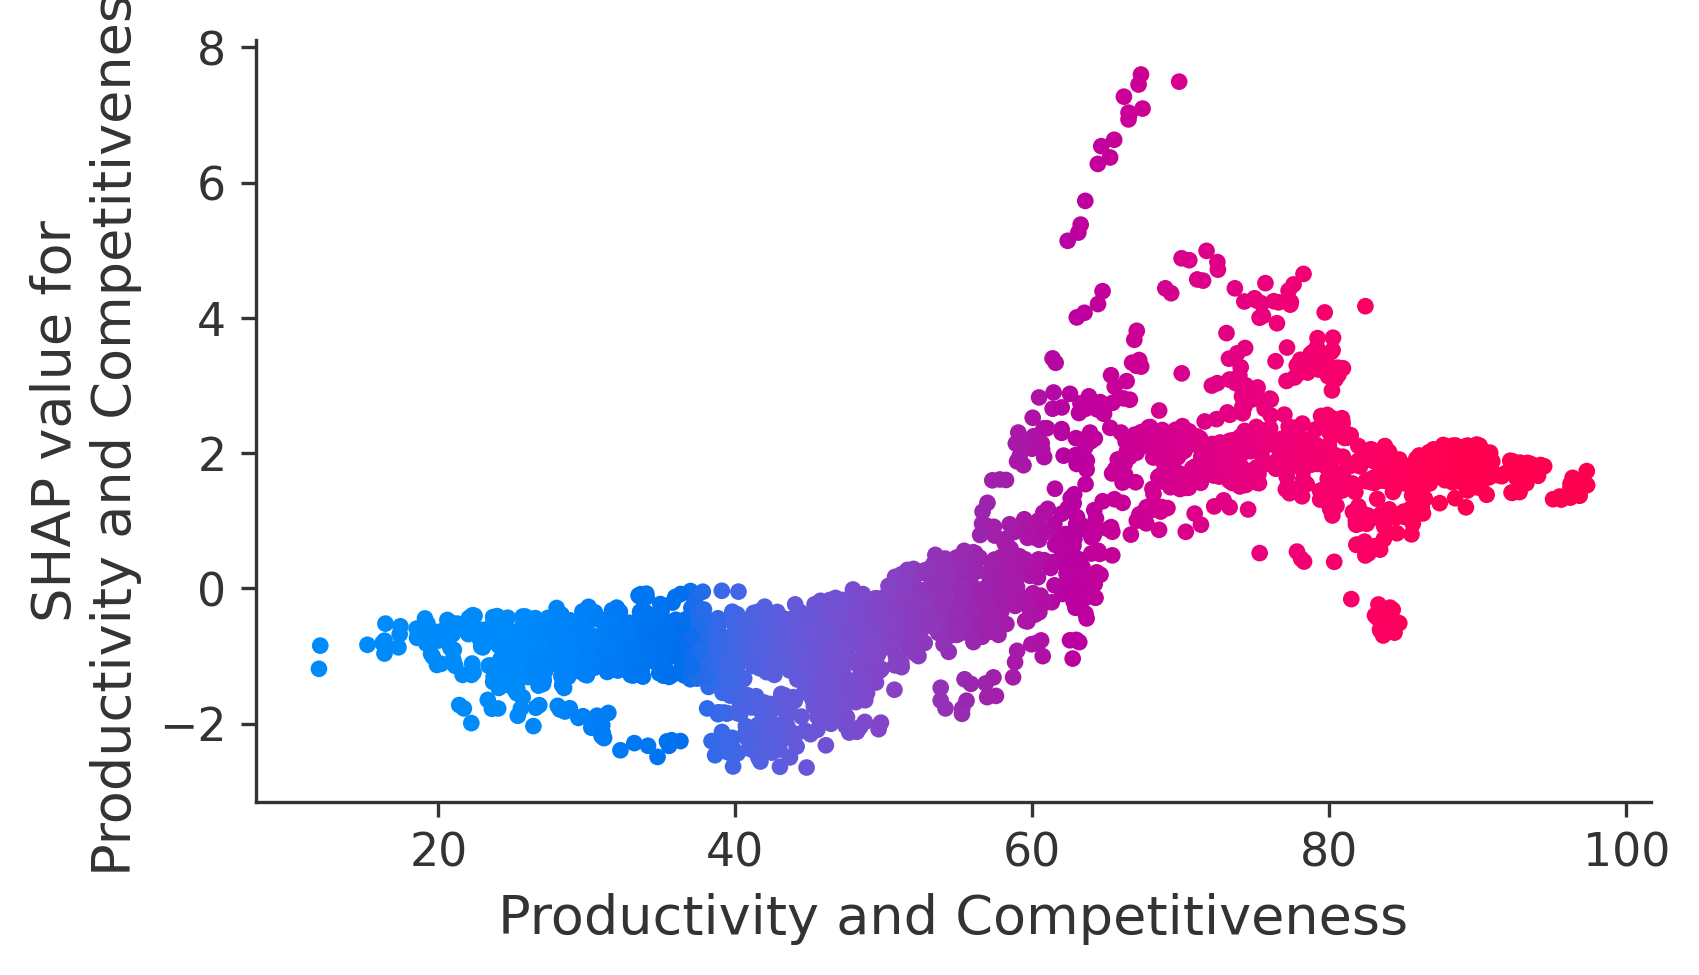

In [110]:
output_file    = 'SHAP_ETR_local_Productivity and Competitiveness_FW'
DataFrame      = df_DataBase_condensed_clone_2

Variable_1     = 'Productivity and Competitiveness'
Variable_2     = 'Productivity and Competitiveness'

fname          = 'M4_ERT_Prod_Comp'

shap_values, df_shap_plot = SHAP_Tree_Explainer_Local(Freshwater_ETR_M4, DataFrame, output_file, \
                                                      Variable_1, Variable_2, feature_vars, fname)

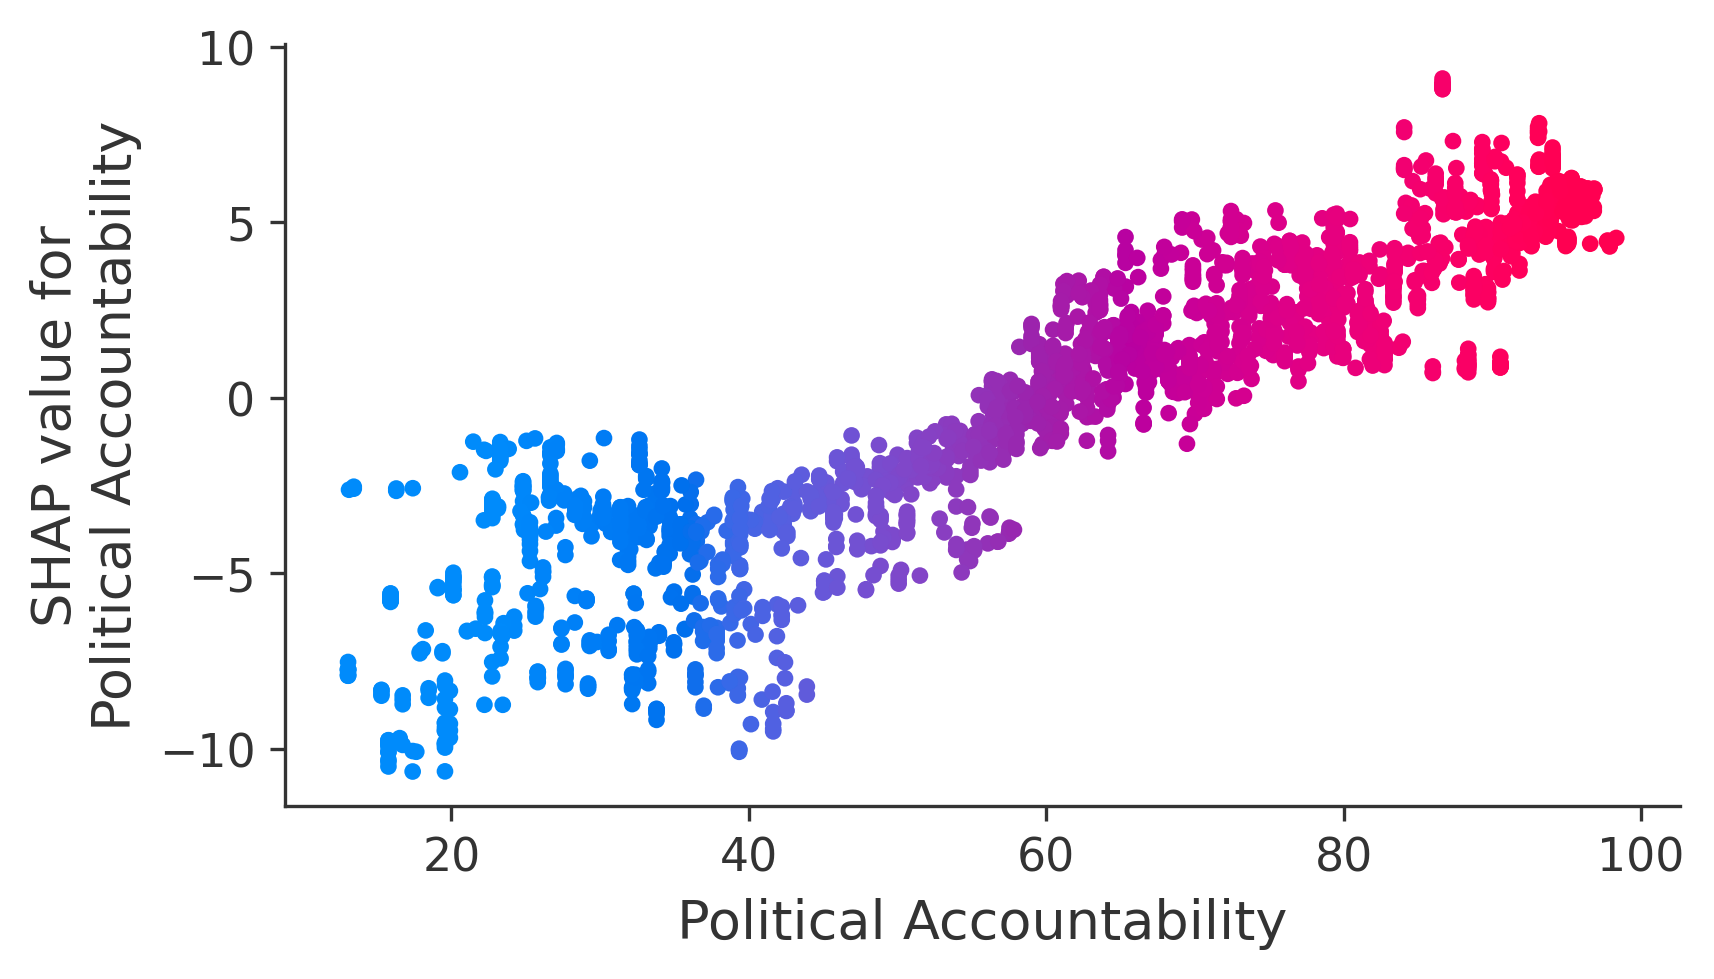

In [111]:
output_file    = 'SHAP_ETR_local_Political Accountability_FW'
DataFrame      = df_DataBase_condensed_clone_2

Variable_1     = 'Political Accountability'
Variable_2     = 'Political Accountability'

fname          = 'M4_ERT_Polit_Accnt'

shap_values, df_shap_plot = SHAP_Tree_Explainer_Local(Freshwater_ETR_M4, DataFrame, output_file, \
                                                      Variable_1, Variable_2, feature_vars, fname)

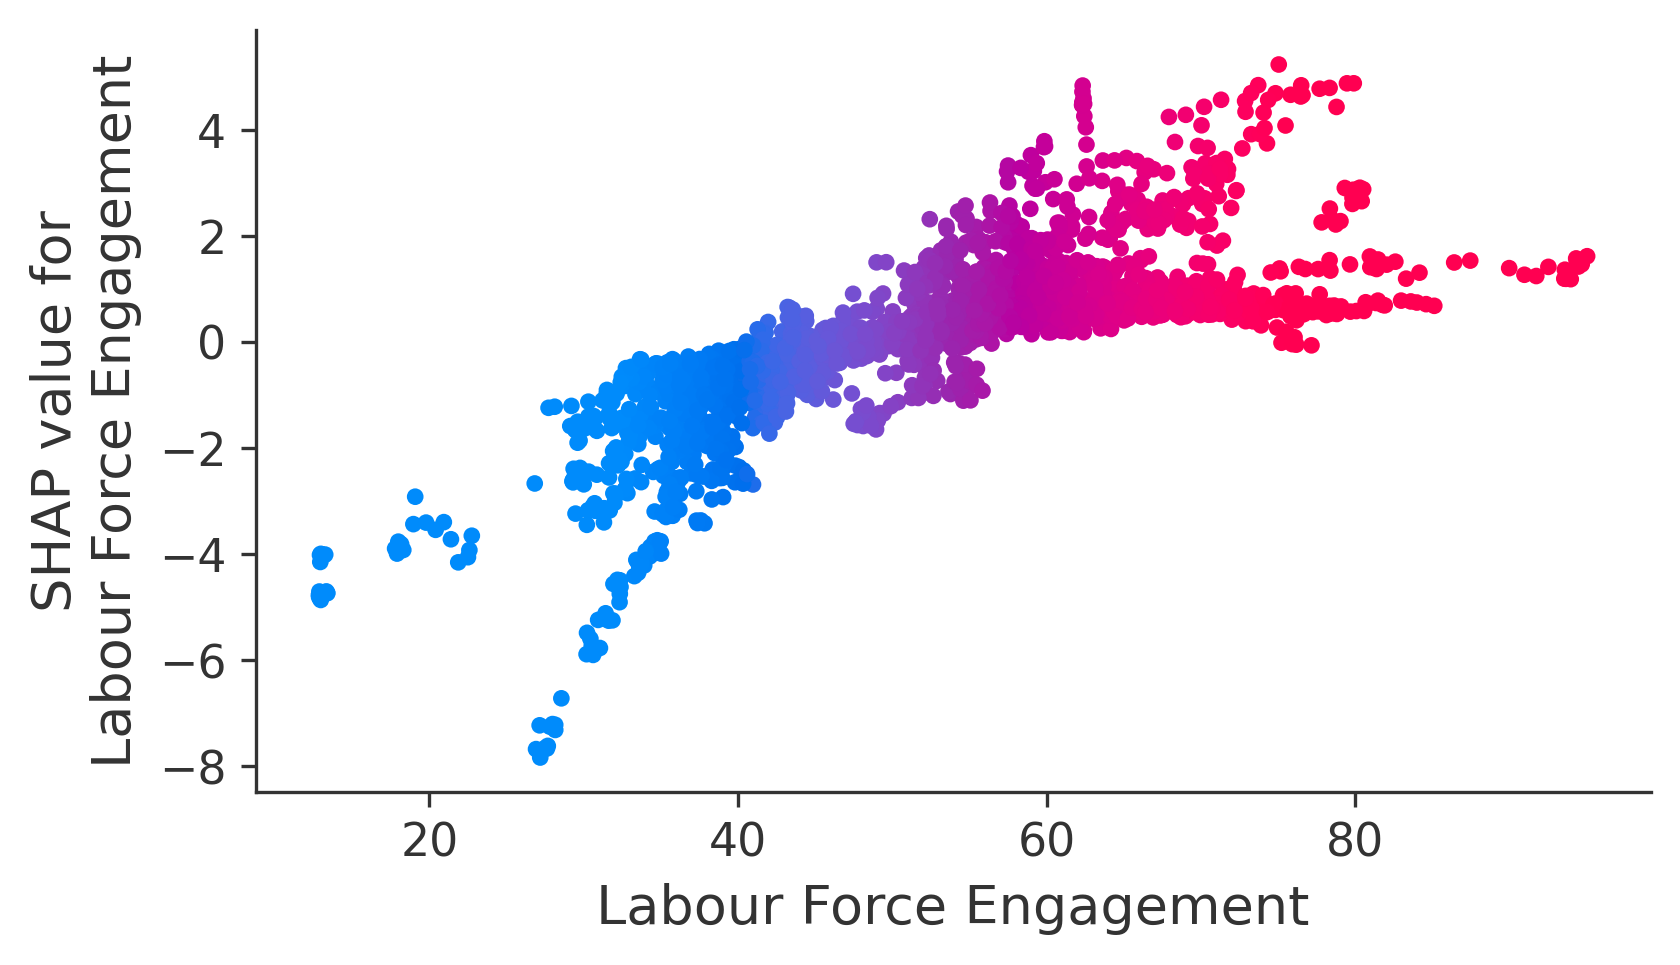

In [112]:
output_file    = 'SHAP_ETR_local_Labour Force Engagement_FW'
DataFrame      = df_DataBase_condensed_clone_2

Variable_1     = 'Labour Force Engagement'
Variable_2     = 'Labour Force Engagement'

fname          = 'M4_ERT_Labor_Force'

shap_values, df_shap_plot = SHAP_Tree_Explainer_Local(Freshwater_ETR_M4, DataFrame, output_file, \
                                                      Variable_1, Variable_2, feature_vars, fname)

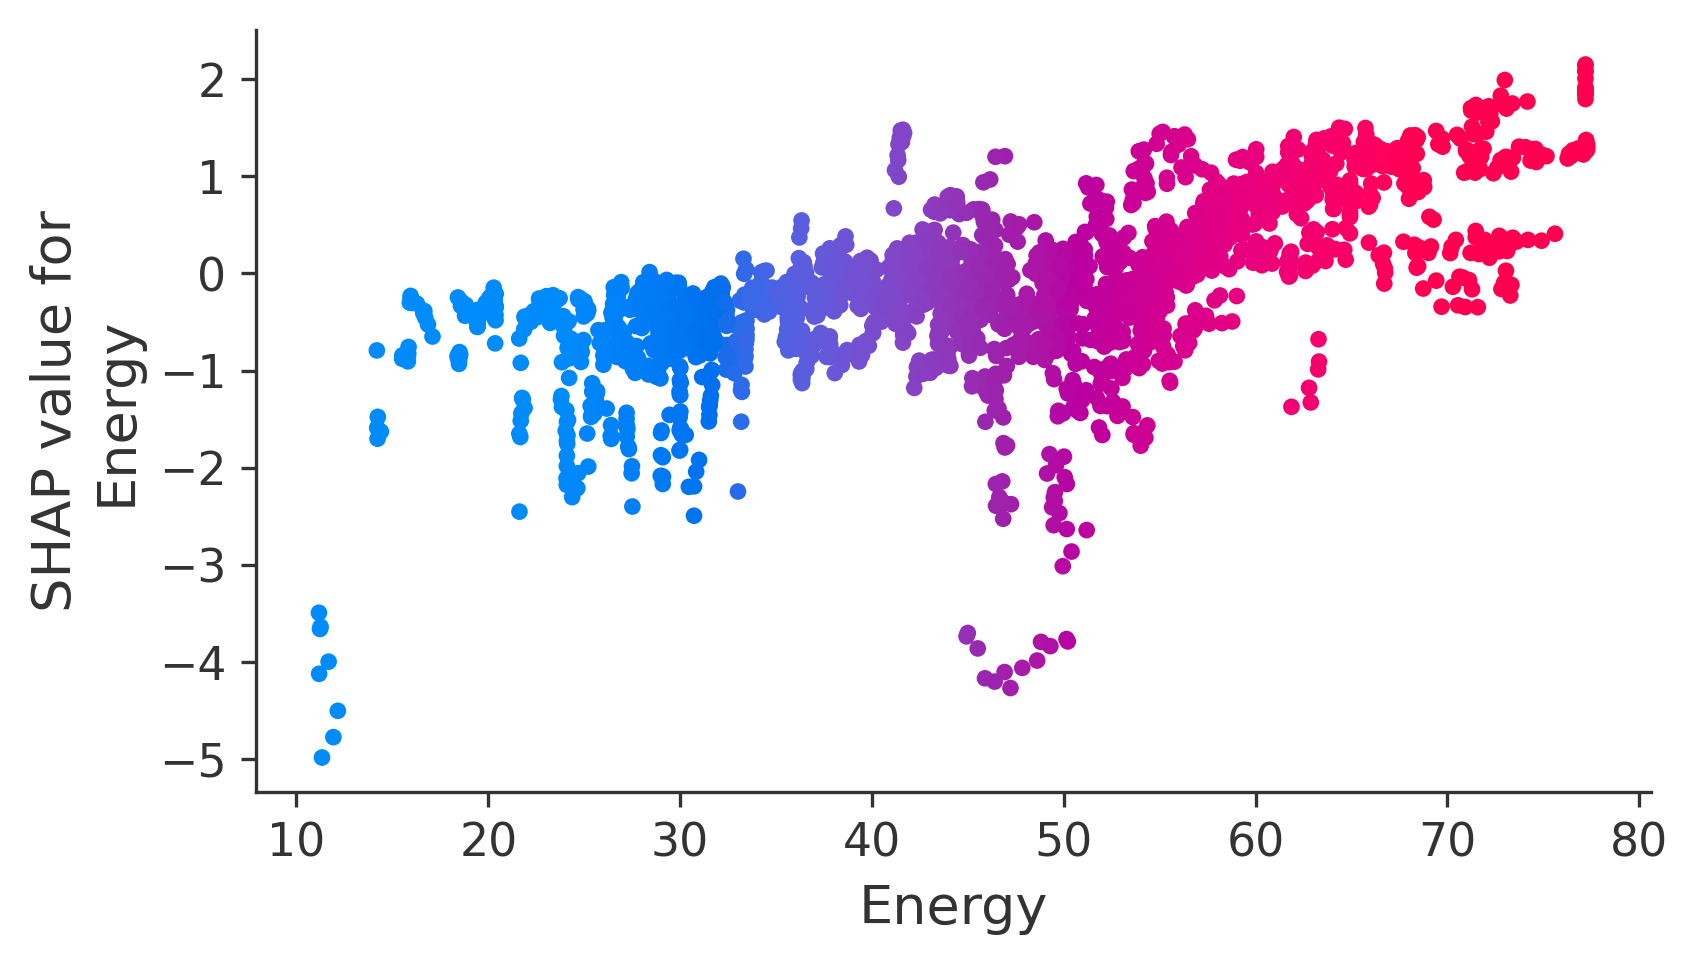

In [113]:
output_file    = 'SHAP_ETR_local_Energy_FW'
DataFrame      = df_DataBase_condensed_clone_2

Variable_1     = 'Energy'
Variable_2     = 'Energy'

fname          = 'M4_ERT_Energy'

shap_values, df_shap_plot = SHAP_Tree_Explainer_Local(Freshwater_ETR_M4, DataFrame, output_file, \
                                                      Variable_1, Variable_2, feature_vars, fname)

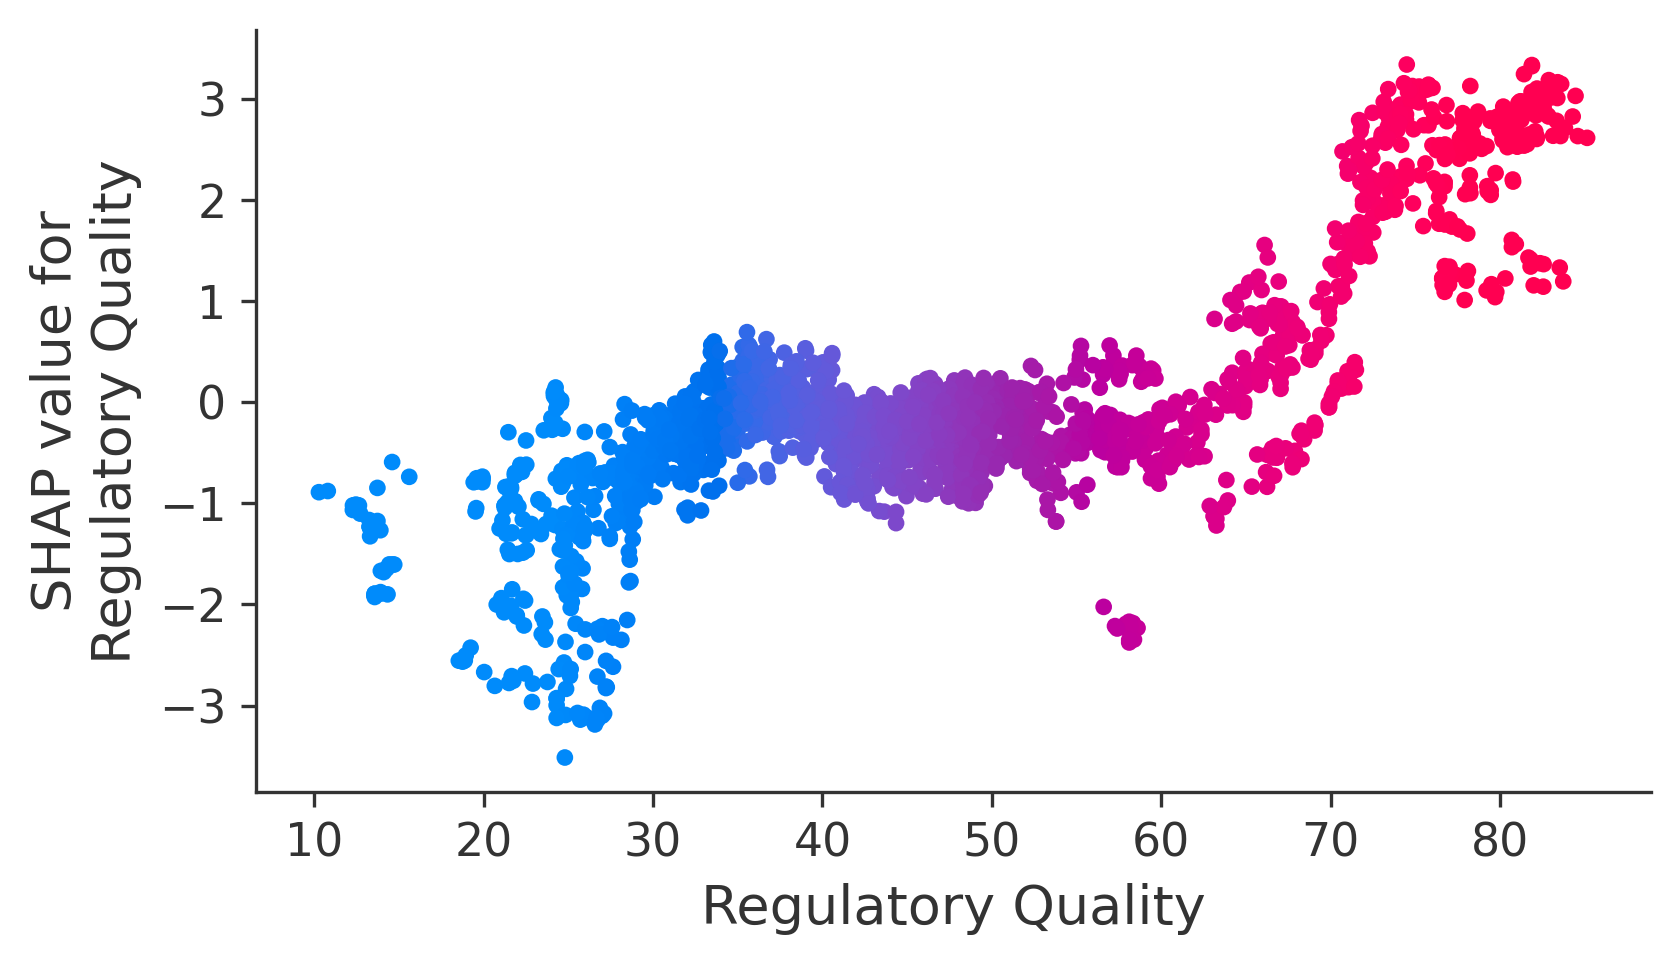

In [114]:
output_file    = 'SHAP_ETR_local_Regulatory Quality_FW'
DataFrame      = df_DataBase_condensed_clone_2

Variable_1     = 'Regulatory Quality'
Variable_2     = 'Regulatory Quality'

fname          = 'M4_ERT_Regulatory Quality'

shap_values, df_shap_plot = SHAP_Tree_Explainer_Local(Freshwater_ETR_M4, DataFrame, output_file, \
                                                      Variable_1, Variable_2, feature_vars, fname)

### <font color='slateblue'> Countries

In [116]:
# with all 5 conditions

conditions = []

condition_1 = median_values['Productivity and Competitiveness'] >= 60
condition_2 = median_values['Political Accountability'] >= 60
condition_3 = median_values['Labour Force Engagement'] >= 50
condition_4 = median_values['Energy'] >= 59
condition_5 = median_values['Regulatory Quality'] >= 62

conditions = condition_1 & condition_2 & condition_3 #& condition_4 #& condition_5

# Apply the conditions to the DataFrame
filtered_df = median_values[conditions]

# Get the unique index values of the filtered DataFrame
countries = []
countries = filtered_df.index.unique()

countries_list = []
countries_list = countries.tolist()

print('Countries protecting their Forest, Land, Soil:', ', '.join(countries_list))


Countries protecting their Forest, Land, Soil: Australia, Austria, Belgium, Brazil, Bulgaria, Canada, Costa Rica, Croatia, Cyprus, Czechia, Denmark, Estonia, Finland, France, Germany, Hong Kong, Hungary, Iceland, Ireland, Israel, Italy, Japan, Latvia, Lithuania, Luxembourg, Malta, Mexico, Netherlands, New Zealand, Norway, Panama, Philippines, Poland, Portugal, Romania, Slovakia, Slovenia, South Korea, Spain, Suriname, Sweden, Switzerland, Taiwan, Ukraine, United Kingdom, United States, Uruguay


In [117]:
# with all 5 conditions

conditions = []

condition_1 = median_values['Productivity and Competitiveness'] >= 60
condition_2 = median_values['Political Accountability'] >= 60
condition_3 = median_values['Labour Force Engagement'] >= 50
condition_4 = median_values['Energy'] >= 58
condition_5 = median_values['Regulatory Quality'] >= 62

conditions = condition_1 & condition_2 & condition_3 & condition_4 & condition_5

# Apply the conditions to the DataFrame
filtered_df = median_values[conditions]

# Get the unique index values of the filtered DataFrame
countries = []
countries = filtered_df.index.unique()

countries_list = []
countries_list = countries.tolist()

print('Countries protecting their Forest, Land, Soil:', ', '.join(countries_list))


Countries protecting their Forest, Land, Soil: Australia, Austria, Canada, Denmark, Finland, Germany, Iceland, Japan, Luxembourg, Norway, Sweden, Switzerland, Taiwan, United States
